# Propensity Prediction
<hr/>

## Import Libraries
<hr/>

In [6]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier


#import statsmodels.api as sm
#from yellowbrick.model_selection import FeatureImportances
#from yellowbrick.classifier import ROCAUC
#import lightgbm as lgb
from sklearn.metrics import f1_score
#from imblearn.over_sampling import RandomOverSampler 
from sklearn.model_selection import train_test_split

import seaborn as sns 
import matplotlib.pyplot as plt
#from yellowbrick.model_selection import FeatureImportances
#from yellowbrick.classifier import ROCAUC, PrecisionRecallCurve, ConfusionMatrix


#from graphviz import Source
from IPython.display import display
from IPython.display import Image
import warnings
warnings.filterwarnings('ignore')

## Data
<hr/>

### Read Data
<hr/>

In [7]:
# read data
df_basket = pd.read_csv('df_basket.csv')
df_demo = pd.read_csv('df_demo.csv')
df_fav = pd.read_csv('df_fav.csv')
df_product = pd.read_csv('df_product.csv')
df_search_term = pd.read_csv('df_search_term.csv')
df_target_train = pd.read_csv('df_target_train.csv')
df_test = pd.read_csv('df_test.csv')
df_trx = pd.read_csv('df_trx.csv')
df_visit = pd.read_csv('df_visit.csv')

In [30]:
pd.set_option('display.max_rows', 200)

In [20]:
df_visit.head(10)
df_visit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14389920 entries, 0 to 14389919
Data columns (total 4 columns):
 #   Column              Dtype  
---  ------              -----  
 0   userid              int64  
 1   contentid           float64
 2   partition_date      object 
 3   productdetailcount  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 439.1+ MB


### df_demo
<hr/>

In [25]:
df_visit_product = df_visit.merge(df_product,how='left',on=['contentid'])

KeyboardInterrupt: 

In [34]:
a = df_visit_product[df_visit_product["userid"] == 24692048]
a.head()

userid   contentid           partition_date  productdetailcount  \
0  24692048   2837094.0  2020-10-04 03:00:00.000                   1   
1  24692048  33346848.0  2020-10-01 03:00:00.000                   1   
2  24692048  39928761.0  2020-10-10 03:00:00.000                   1   
3  24692048   7034920.0  2020-10-10 03:00:00.000                   1   
4  24692048   4692584.0  2020-10-18 03:00:00.000                   1   

  currentbugroupname   brandid  gender       age  \
0            Mobilya   22374.0  Unisex  Yetişkin   
1            Mobilya  839203.0  Unisex  Yetişkin   
2            Mobilya  955541.0  Unisex  Yetişkin   
3            Mobilya   36558.0  Unisex  Yetişkin   
4            Mobilya   33440.0  Unisex  Yetişkin   

                                               title              categoryname  
0  A7 Duvar Raflı Tv Sehpası - Kitaplıklı Tv Ünit...  TV Sehpaları & Üniteleri  
1                      37x25 Ceviz Portatif Yansehpa                 Yan Sehpa  
2         Kahverengi Albero Metal Çam Çalışma Masası            Çalışma Masası  
3         Laptop Sehpa Çalışma Kahvaltı Masası Ceviz            Çalışma Masası  
4  Ofis Sandalyesi Sekreter Koltuğu Bilgisayar Ko...        Çalışma Sandalyesi

In [42]:
b = a.groupby(['partition_date'])['productdetailcount'].sum()
b.head()
b['partition_date'].hist(bins=20,figsize=(16,4),edgecolor = "black")


KeyError: 'partition_date'

Shape: (40807, 4)
number of duplicated rows: 0 

     userid gender   age  tenure
0   9798852  Bayan  41.0      89
1  11413556  Bayan  33.0      61
2    818188  Bayan  32.0     125
3  12049002  Bayan  30.0      54
4  10083038  Bayan  39.0      84 

userid    40807
gender        4
age          97
tenure      130
dtype: int64

---- gender ----
Bayan               31202
Bay                  9378
UNKNOWN               218
kvkktalepsilindi        9
Name: gender, dtype: int64

*************************

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40807 entries, 0 to 40806
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   userid  40807 non-null  int64  
 1   gender  40807 non-null  object 
 2   age     25204 non-null  float64
 3   tenure  40807 non-null  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 1.2+ MB
None

---- MISSING VALUE RATIOS ----
userid    0.000000
gender    0.000000
age       0.382361
tenure    0

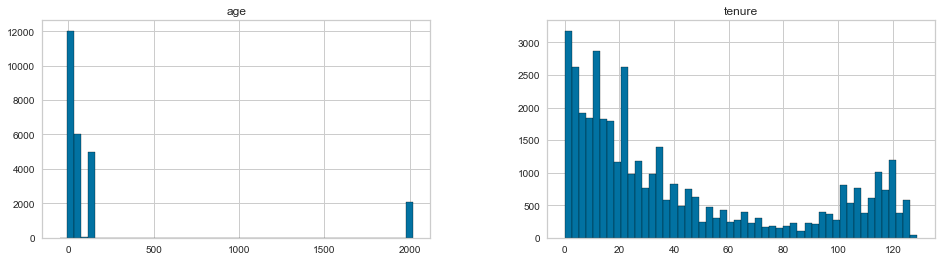

In [5]:
print("Shape:", df_demo.shape)
print("number of duplicated rows:", df_demo[df_demo.duplicated()].shape[0],"\n")
print(df_demo.head(),"\n")
print(df_demo.nunique())
print("\n---- gender ----")
print(df_demo.gender.value_counts(dropna=False))
print("\n*************************\n")
print(df_demo.info())
missing_value_ratios = df_demo.isnull().mean()
print("\n---- MISSING VALUE RATIOS ----")
print(missing_value_ratios)
print("\n*************************\n")
print("Median age:", df_demo["age"].median())
print("Median tenure:", df_demo["tenure"].median(), "\n")
print(df_demo.describe())
print("\n*************************\n")
df_demo[["age", "tenure"]].hist(bins=50,figsize=(16,4),edgecolor = "black")
plt.show()
#df_demo["age"].value_counts()

Remove negatives and bigger than 100 ages


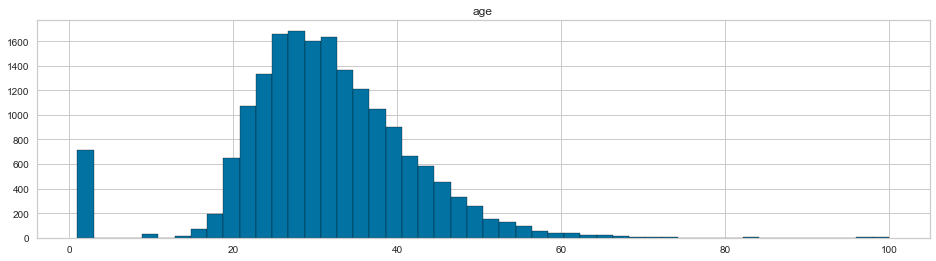

In [6]:
print("Remove negatives and bigger than 100 ages")

df_demo[(df_demo["age"]>0) & (df_demo["age"]<=100)]['age'].hist(bins=50,figsize=(16,4),edgecolor = "black")
plt.title('age')
plt.show()

Shape: (17314, 4)
Percentage: 44.25

************ Age <= 12 ************ 

 2.0     710
 9.0      20
 10.0     10
 0.0       2
 12.0      2
-37.0      1
 1.0       1
 3.0       1
-48.0      1
 4.0       1
Name: age, dtype: int64

************ Age > 75 ************ 

120.0     4960
2019.0    2102
119.0       16
117.0       10
115.0        7
121.0        6
114.0        5
118.0        5
116.0        4
98.0         3
100.0        3
81.0         2
97.0         2
109.0        2
113.0        2
88.0         2
83.0         2
96.0         1
136.0        1
146.0        1
127.0        1
112.0        1
124.0        1
77.0         1
84.0         1
Name: age, dtype: int64

************ Age > 75 ************ 



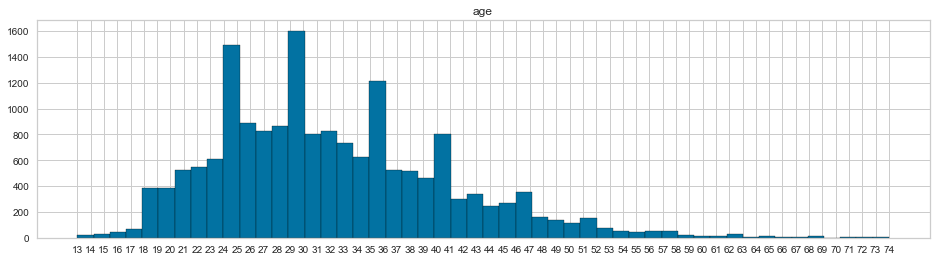

In [7]:
print("Shape:", df_demo[(df_demo["age"]>12) & (df_demo["age"]<=75)].shape)
print("Percentage:", round(df_demo[(df_demo["age"]>0) & (df_demo["age"]<=75)].shape[0]/df_demo.shape[0]*100,2))
print("\n************ Age <= 12 ************ \n")
print(df_demo[(df_demo["age"]<=12)]['age'].value_counts(dropna=False))
print("\n************ Age > 75 ************ \n")
print(df_demo[(df_demo["age"]>75)]['age'].value_counts(dropna=False))
print("\n************ Age > 75 ************ \n")
df_demo[(df_demo["age"]>12) & (df_demo["age"]<=75)]['age'].hist(bins=50,figsize=(16,4),edgecolor = "black")
age_min= df_demo[(df_demo["age"]>12) & (df_demo["age"]<=75)]['age'].min()
age_max= df_demo[(df_demo["age"]>12) & (df_demo["age"]<=75)]['age'].max()
plt.xticks(np.arange(age_min, age_max+1, 1.0))
plt.title('age')
plt.show()

***Age Bins***

 - 12 < age < 18 -> mid-high school students
 - 18 <= age <= 25 -> university students
 - 25 < age <= 40 -> people who work and are good with technology
 - 40 < age <= 55
 - 56 < age <= 75 

In [8]:
df_demo['age_category'] = df_demo['age'].apply(lambda x: 'abnormal' if (x<=12 or x>75 or pd.isna(x))
                                                     else ('13-17' if (x>12 and x<18) 
                                                     else ('18-25' if (x>=18 and x<=25) 
                                                     else ('26-40' if (x>25 and x<=40)  
                                                     else ('41-55' if (x>40 and x<=55) 
                                                     else '56-75' )))))
df_demo = df_demo.drop(columns=['age'])
print(df_demo['age_category'].value_counts(dropna=False))
print("\n*************************\n")
print(df_demo.head())

abnormal    23493
26-40       10329
18-25        3945
41-55        2617
56-75         259
13-17         164
Name: age_category, dtype: int64

*************************

     userid gender  tenure age_category
0   9798852  Bayan      89        41-55
1  11413556  Bayan      61        26-40
2    818188  Bayan     125        26-40
3  12049002  Bayan      54        26-40
4  10083038  Bayan      84        26-40


### df_trx
<hr/>

Shape: (381536, 5)
number of duplicated rows: 2587 

min date: 2020-10-01 04:00:00.000
max date: 2020-11-01 03:00:00.000 

     userid   contentid                orderdate  quantity   price
0  16049866  49489653.0  2020-10-31 03:00:00.000         1  199.95
1  14167874  42484094.0  2020-10-31 03:00:00.000         1   69.99
2  14167874  39373962.0  2020-10-31 03:00:00.000         1   69.99
3  13918576  32765999.0  2020-10-31 03:00:00.000         1   43.99
4  10323124  46471016.0  2020-10-31 03:00:00.000         1   58.32 

userid        31027
contentid    187557
orderdate       744
quantity         10
price         27656
dtype: int64

---- gender ----
Bayan               31202
Bay                  9378
UNKNOWN               218
kvkktalepsilindi        9
Name: gender, dtype: int64

*************************

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381536 entries, 0 to 381535
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------  

array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

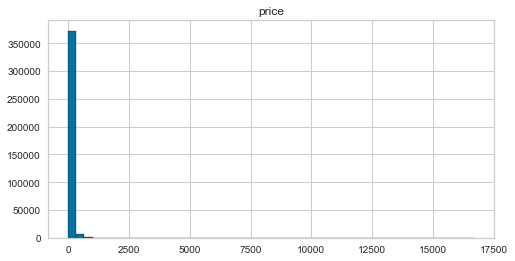

In [9]:
print("Shape:", df_trx.shape)
print("number of duplicated rows:", df_trx[df_trx.duplicated()].shape[0],"\n")
print("min date:",df_trx['orderdate'].min())
print("max date:",df_trx['orderdate'].max(),"\n")
print(df_trx.head(),"\n")
print(df_trx.nunique())
print("\n---- gender ----")
print(df_demo.gender.value_counts(dropna=False))
print("\n*************************\n")
print(df_trx.info())
missing_value_ratios = df_trx.isnull().mean() 
print("\n---- MISSING VALUE RATIOS ----")
print(missing_value_ratios)
print("\n*************************\n")
print("Median age:", df_trx["price"].median(),"\n")
print(df_trx.describe())
print("\n*************************\n")
df_trx[["price"]].hist(bins=50,figsize=(8,4),edgecolor = "black")
#plt.show()

In [10]:
df_trx['orderdate'].value_counts(dropna=False)

2020-10-08 23:00:00.000    2647
2020-10-08 22:00:00.000    2282
2020-10-08 21:00:00.000    2158
2020-10-05 21:00:00.000    1965
2020-10-06 22:00:00.000    1939
                           ... 
2020-10-26 05:00:00.000      11
2020-10-31 05:00:00.000      11
2020-10-01 04:00:00.000      10
2020-10-27 05:00:00.000       8
2020-10-11 06:00:00.000       7
Name: orderdate, Length: 744, dtype: int64

In [11]:
# adjust df
df_trx['orderdate'] = pd.to_datetime(df_trx['orderdate'])

In [15]:
df_trx[df_trx['quantity']>1].head()

userid   contentid           orderdate  quantity   price
28  36986474  55347570.0 2020-10-31 10:00:00         4  158.35
30  36986474  55347570.0 2020-10-31 10:00:00         4  158.35
34  36986474  55347570.0 2020-10-31 10:00:00         4  158.35
37   2993368  43448526.0 2020-10-31 10:00:00         3    7.47
48   2993368  43448521.0 2020-10-31 10:00:00         2    4.98

In [16]:
df_trx[df_trx['contentid']== 43448521.0].head()

userid   contentid           orderdate  quantity  price
48      2993368  43448521.0 2020-10-31 10:00:00         2   4.98
32029  13906914  43448521.0 2020-10-18 17:00:00         1   1.99
44067  22734684  43448521.0 2020-10-12 13:00:00         1   2.49
46179  19909666  43448521.0 2020-10-31 14:00:00         1   2.49
71954  12301212  43448521.0 2020-10-31 17:00:00         1   2.49

In [17]:
df_trx['unit_price_of_content'] = df_trx['price']/df_trx['quantity']
tempdf4 = df_trx[['contentid','unit_price_of_content']].groupby('contentid').nunique().reset_index()
print(tempdf4.nunique(), '\n')
print(tempdf4.head(), '\n')
print(df_trx[df_trx['contentid']==51973.0], '\n')
print(df_trx[df_trx['contentid']==52015.0], '\n')
print("number of duplicated rows:", df_trx[df_trx.duplicated()].shape[0])
print("duplicated row percentage:", round(df_trx[df_trx.duplicated()].shape[0] / df_trx.shape[0] *100,2),"\n")
df_trx[df_trx.duplicated()].head()

contentid                187557
unit_price_of_content        57
dtype: int64 

   contentid  unit_price_of_content
0    48691.0                      1
1    51973.0                      2
2    51974.0                      1
3    52007.0                      1
4    52015.0                      2 

          userid  contentid           orderdate  quantity  price  \
75406   23887906    51973.0 2020-10-31 14:00:00         2   38.0   
117962  41196078    51973.0 2020-11-01 03:00:00         1   19.0   
225448  16213484    51973.0 2020-10-12 11:00:00         1   20.0   

        unit_price_of_content  
75406                    19.0  
117962                   19.0  
225448                   20.0   

          userid  contentid           orderdate  quantity  price  \
189999  12451782    52015.0 2020-10-24 09:00:00         1  45.91   
343485  17870482    52015.0 2020-10-07 22:00:00         2  69.00   

        unit_price_of_content  
189999                  45.91  
343485                  34.50  

userid   contentid           orderdate  quantity   price  \
30    36986474  55347570.0 2020-10-31 10:00:00         4  158.35   
34    36986474  55347570.0 2020-10-31 10:00:00         4  158.35   
90    37884812  35195589.0 2020-10-31 10:00:00         1   36.30   
124   36986474  55347570.0 2020-10-31 10:00:00         4  158.35   
1313  37884812  34931887.0 2020-10-31 10:00:00         1   63.53   

      unit_price_of_content  
30                  39.5875  
34                  39.5875  
90                  36.3000  
124                 39.5875  
1313                63.5300

In [18]:
# drop duplicates
df_trx = df_trx.drop_duplicates()

### df_fav
<hr/>

In [19]:
#df_fav['partition_date'].value_counts()
print("Shape:", df_fav.shape)
print("number of duplicated rows:", df_fav[df_fav.duplicated()].shape[0],"\n")
print("min date:",df_fav['partition_date'].min())
print("max date:",df_fav['partition_date'].max(),"\n")
print(df_fav.head(),"\n")
print(df_fav.nunique())
print("\n*************************\n")
print(df_fav.info())
missing_value_ratios = df_fav.isnull().mean()
print("\n---- MISSING VALUE RATIOS ----")
print(missing_value_ratios)

Shape: (733827, 4)
number of duplicated rows: 0 

min date: 2020-10-01 03:00:00.000
max date: 2020-10-31 03:00:00.000 

     userid  contentid           partition_date  fav_count
0  17627638   32509331  2020-10-02 03:00:00.000          1
1   7757008   31759112  2020-10-08 03:00:00.000          1
2   7757008   53750743  2020-10-31 03:00:00.000          1
3   7757008    6508034  2020-10-14 03:00:00.000          1
4   7757008   31437207  2020-10-20 03:00:00.000          1 

userid             14707
contentid         346580
partition_date        31
fav_count             22
dtype: int64

*************************

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 733827 entries, 0 to 733826
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   userid          733827 non-null  int64 
 1   contentid       733827 non-null  int64 
 2   partition_date  733827 non-null  object
 3   fav_count       733827 non-null  int64 
dty

In [20]:
# adjust df
df_fav['partition_date'] = pd.to_datetime(df_fav['partition_date'])

### df_visit
<hr/>

In [21]:
#df_visit['partition_date'].value_counts()
print("Shape:", df_visit.shape)
print("number of duplicated rows:", df_visit[df_visit.duplicated()].shape[0],"\n")
print("min date:",df_visit['partition_date'].min())
print("max date:",df_visit['partition_date'].max(),"\n")
print(df_visit.head(),"\n")
print(df_visit.nunique())
print("\n*************************\n")
print(df_visit.info())
missing_value_ratios = df_visit.isnull().mean()
print("\n---- MISSING VALUE RATIOS ----")
print(missing_value_ratios, '\n')
print("number of missing cotentid columns:",df_visit[df_visit['contentid'].isnull()].shape[0])

Shape: (14389920, 4)
number of duplicated rows: 0 

min date: 2020-10-01 03:00:00.000
max date: 2020-10-31 03:00:00.000 

     userid   contentid           partition_date  productdetailcount
0  24692048   2837094.0  2020-10-04 03:00:00.000                   1
1  24692048  33346848.0  2020-10-01 03:00:00.000                   1
2  24692048  39928761.0  2020-10-10 03:00:00.000                   1
3  24692048   7034920.0  2020-10-10 03:00:00.000                   1
4  24692048   4692584.0  2020-10-18 03:00:00.000                   1 

userid                  38808
contentid             1926302
partition_date             31
productdetailcount        100
dtype: int64

*************************

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14389920 entries, 0 to 14389919
Data columns (total 4 columns):
 #   Column              Dtype  
---  ------              -----  
 0   userid              int64  
 1   contentid           float64
 2   partition_date      object 
 3   productdetailcoun

In [22]:
# adjust df
df_visit['partition_date'] = pd.to_datetime(df_visit['partition_date'])

### df_basket
<hr/>

In [23]:
#df_basket['partition_date'].value_counts()
print("Shape:", df_basket.shape)
print("number of duplicated rows:", df_basket[df_basket.duplicated()].shape[0],"\n")
print("min date:",df_basket['partition_date'].min())
print("max date:",df_basket['partition_date'].max(),"\n")
print(df_basket.head(),"\n")
print(df_basket.nunique())
print("\n*************************\n")
print(df_basket.info())
missing_value_ratios = df_basket.isnull().mean()
print("\n---- MISSING VALUE RATIOS ----")
print(missing_value_ratios)

Shape: (406268, 4)
number of duplicated rows: 0 

min date: 2020-10-01 03:00:00.000
max date: 2020-10-31 03:00:00.000 

     userid  contentid           partition_date  addtobasket_count
0  42366578   41474373  2020-10-31 03:00:00.000                  1
1  35956834   43278838  2020-10-31 03:00:00.000                  1
2  26139571   31714898  2020-10-31 03:00:00.000                  2
3   3262246   47879560  2020-10-31 03:00:00.000                  1
4  20056671   44746302  2020-10-31 03:00:00.000                  1 

userid               183048
contentid            198683
partition_date           31
addtobasket_count        22
dtype: int64

*************************

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406268 entries, 0 to 406267
Data columns (total 4 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   userid             406268 non-null  int64 
 1   contentid          406268 non-null  int64 
 2   partition_date  

In [24]:
# adjust df
df_basket['partition_date'] = pd.to_datetime(df_basket['partition_date'])

### df_search_term
<hr/>

In [25]:
#df_search_term['partition_date'].value_counts()
print("Shape:", df_search_term.shape)
print("number of duplicated rows:", df_search_term[df_search_term.duplicated()].shape[0],"\n")
print("min date:",df_search_term['partition_date'].min())
print("max date:",df_search_term['partition_date'].max(),"\n")
print(df_search_term.head(),"\n")
print(df_search_term.nunique())
print("\n*************************\n")
print(df_search_term.info())
missing_value_ratios = df_search_term.isnull().mean()
print("\n---- MISSING VALUE RATIOS ----")
print(missing_value_ratios)

Shape: (1281753, 3)
number of duplicated rows: 0 

min date: 2020-10-01
max date: 2020-10-31 

     userid partition_date       search_term
0  29474088     2020-10-05       tum urunler
1  29474088     2020-10-07              nike
2  29474088     2020-10-07  hummel hmlkansas
3  29474088     2020-10-07  adidas superstar
4  29474088     2020-10-09       tum urunler 

userid             36442
partition_date        31
search_term       373426
dtype: int64

*************************

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1281753 entries, 0 to 1281752
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   userid          1281753 non-null  int64 
 1   partition_date  1281753 non-null  object
 2   search_term     1281752 non-null  object
dtypes: int64(1), object(2)
memory usage: 29.3+ MB
None

---- MISSING VALUE RATIOS ----
userid            0.000000e+00
partition_date    0.000000e+00
search_term       7.80181

In [26]:
# adjust df
df_search_term['partition_date'] = pd.to_datetime(df_search_term['partition_date'])

### df_product
<hr/>

In [27]:
print("Shape:", df_product.shape)
print("number of duplicated rows:", df_product[df_product.duplicated()].shape[0],"\n")
print(df_product.head(),"\n")
print(df_product.nunique())
print("\n*************************\n")
print(df_product.info())
missing_value_ratios = df_product.isnull().mean() 
print("\n---- MISSING VALUE RATIOS ----")
print(missing_value_ratios)

Shape: (1441753, 7)
number of duplicated rows: 0 

   contentid currentbugroupname  brandid  gender       age  \
0   40100964   Ayakkabı & Çanta    37787   Erkek  Yetişkin   
1   40427970    Branded Tekstil      169   Kadın  Yetişkin   
2   41026644               FMCG    20150  Unisex  Yetişkin   
3   41227029    Branded Tekstil    11806   Kadın  Yetişkin   
4   40770080                 Ev     2195  Unisex  Yetişkin   

                                               title            categoryname  
0  Siyah Kauçuk Taban Büyük Numara Spor Ayakkab R...         Klasik Ayakkabı  
1         Kadın Siyah Çizgili Cepli Kuşaklı Pantolon                Pantolon  
2  Color Growth Healt Formula (800-1200) 100gr Aç...  Akvaryum Balık Yemleri  
3              Kadın  Pamuk Paçalı Ribana Külot B005                   Külot  
4                          Suki - Sushi Seti 8 Parça                   Tabak   

contentid             1441753
currentbugroupname         13
brandid                 49959
gender    

currentbugroupname      
Branded Tekstil             420275
Ev                          242807
GM                          200989
Ayakkabı & Çanta            120934
Aksesuar & Saat & Gözlük    113688
FMCG                        104966
Elektronik                   68341
GAS                          60113
Kozmetik                     52424
Mobilya                      39611
Private Label                16635
UNKNOWN                        797
Digital Goods                  173
dtype: int64 



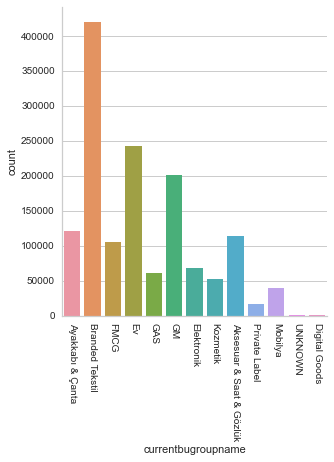


*************************

gender
Kadın     535505
Unisex    526134
NaN       221582
Erkek     158532
dtype: int64 



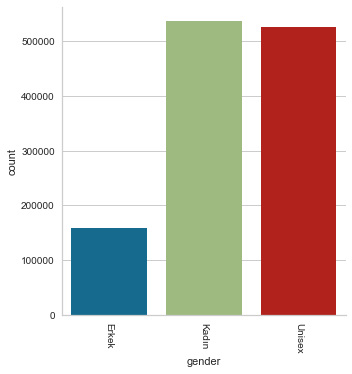


*************************

age     
Yetişkin    999341
NaN         311206
Çocuk        88009
Bebek        34151
Genç          9046
dtype: int64 



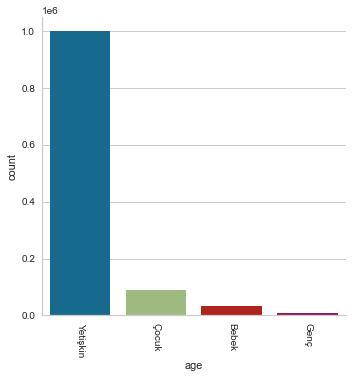


*************************

title                     
Kadın Kol Saati               3349
Erkek Kol Saati               2810
Kadın Güneş Gözlüğü           1039
Siyah Kadın Bot                805
Tişört                         791
                              ... 
Gugw0050g4 Erkek Kol Saati       1
Gugw0051g3 Erkek Kol Saati       1
Gugw0053g1 Erkek Kol Saati       1
Gugw0053g3 Erkek Kol Saati       1
Kadın Mercan Inci Kolye          1
Length: 1201785, dtype: int64 


*************************

categoryname        
Elbise                  32290
T-Shirt                 28483
Bot & Bootie            28150
Sweatshirt              25313
Sneaker                 23913
                        ...  
Uydu Bölücüler              1
Motosiklet Kayışları        1
Yazılabilir CD              1
Tekerlek Sensörü            1
Daksil                      1
Length: 2529, dtype: int64 


*************************



In [28]:
categorical_columns = df_product.columns[df_product.dtypes == 'object'].values
for i, cat_col in enumerate(categorical_columns, 1):
    print(df_product[[cat_col]].value_counts(dropna=False), '\n')
    
    if df_product[cat_col].nunique() < 50:
        sns.catplot(x = cat_col, kind="count", data = df_product)
        plt.xticks(rotation=-90)
        plt.show()
    print("\n*************************\n")

In [29]:
df_product[['currentbugroupname', 'gender', 'age', 'categoryname', 
            'title',]].groupby(['currentbugroupname' , 'gender', 'age']).nunique().head()

categoryname  title
currentbugroupname       gender age                          
Aksesuar & Saat & Gözlük Erkek  Bebek               12     24
                                Genç                10     63
                                Yetişkin            76   7561
                                Çocuk               17     80
                         Kadın  Bebek               14    106

In [30]:
# calculate contentid, title and categoryname counts
df_product_adjusted = df_product[['currentbugroupname', 'contentid', 'title', 
                                  'categoryname']].groupby('currentbugroupname').nunique().reset_index()
df_product_adjusted

currentbugroupname  contentid   title  categoryname
0   Aksesuar & Saat & Gözlük     113688   88827           349
1           Ayakkabı & Çanta     120934   82879           178
2            Branded Tekstil     420275  331895           603
3              Digital Goods        173     173             8
4                 Elektronik      68341   59755           380
5                         Ev     242807  213562           788
6                       FMCG     104966   99780           705
7                        GAS      60113   44177           281
8                         GM     200989  187795          1661
9                   Kozmetik      52424   50704           221
10                   Mobilya      39611   35827           189
11             Private Label      16635   12801            63
12                   UNKNOWN        797     753           219

In [31]:
#calculate percentages and merge
# gender
tempdf4 = pd.DataFrame(df_product.groupby(['currentbugroupname'])['gender'].value_counts(normalize=True))
tempdf4 = tempdf4.rename(columns={'gender':'rate'}).reset_index()
tempdf4 = pd.pivot_table(tempdf4,values='rate', index='currentbugroupname',columns='gender').fillna(0).reset_index()
# age
tempdf5 = pd.DataFrame(df_product.groupby(['currentbugroupname'])['age'].value_counts(normalize=True))
tempdf5 = tempdf5.rename(columns={'age':'rate'}).reset_index()
tempdf5 = pd.pivot_table(tempdf5,values='rate', index='currentbugroupname',columns='age').fillna(0).reset_index()
df_product_adjusted = df_product_adjusted.merge(tempdf4,how='left',on=['currentbugroupname'])
df_product_adjusted = df_product_adjusted.merge(tempdf5,how='left',on=['currentbugroupname'])
# there are Turkish chars in the column names. I rename them
df_product_adjusted.rename(columns={
                    'Bebek':'baby_rate'
                  , 'Genç':'young_rate'
                  , 'Yetişkin':'adult_rate'
                  , 'Çocuk':'child_rate'
                  , 'Erkek':'male_rate'
                  , 'Kadın':'female_rate'
                  , 'Unisex':'unisex_rate'
                  , 'title':'title_count'
                  , 'categoryname':'categoryname_count'
                  , 'contentid':'content_count'},inplace=True)

#df_product_adjusted.drop(columns = ['content_count','title_count','categoryname_count'], inplace=True)
df_product_adjusted

currentbugroupname  content_count  title_count  categoryname_count  \
0   Aksesuar & Saat & Gözlük         113688        88827                 349   
1           Ayakkabı & Çanta         120934        82879                 178   
2            Branded Tekstil         420275       331895                 603   
3              Digital Goods            173          173                   8   
4                 Elektronik          68341        59755                 380   
5                         Ev         242807       213562                 788   
6                       FMCG         104966        99780                 705   
7                        GAS          60113        44177                 281   
8                         GM         200989       187795                1661   
9                   Kozmetik          52424        50704                 221   
10                   Mobilya          39611        35827                 189   
11             Private Label          16635        12801                  63   
12                   UNKNOWN            797          753                 219   

    male_rate  female_rate  unisex_rate  baby_rate  young_rate  adult_rate  \
0    0.115857     0.628459     0.255684   0.002668    0.009594    0.977301   
1    0.166309     0.712309     0.121383   0.001599    0.004944    0.975094   
2    0.204535     0.712622     0.082843   0.059099    0.005175    0.811704   
3    0.000000     0.000000     1.000000   0.000000    0.000000    0.818182   
4    0.016637     0.023151     0.960212   0.000175    0.006023    0.990981   
5    0.007735     0.030434     0.961831   0.006553    0.003021    0.979204   
6    0.021472     0.067842     0.910685   0.063025    0.017700    0.886721   
7    0.473989     0.355342     0.170669   0.001742    0.004120    0.970374   
8    0.023042     0.038841     0.938117   0.036103    0.017317    0.703858   
9    0.046158     0.565753     0.388089   0.001640    0.023807    0.972395   
10   0.004043     0.012645     0.983312   0.008761    0.007136    0.967957   
11   0.133273     0.866546     0.000180   0.000000    0.000181    0.999819   
12   0.187079     0.390310     0.422611   0.014825    0.005391    0.843666   

    child_rate  
0     0.010437  
1     0.018363  
2     0.124022  
3     0.181818  
4     0.002822  
5     0.011222  
6     0.032554  
7     0.023764  
8     0.242722  
9     0.002159  
10    0.016145  
11    0.000000  
12    0.136119

### df_target_train
<hr/>

In [32]:
#df_target_train['partition_date'].value_counts()
print("Shape:", df_target_train.shape)
print("number of duplicated rows:", df_target_train[df_target_train.duplicated()].shape[0],"\n")
print(df_target_train.head(),"\n")
print(df_target_train.nunique())
print("\n*************************\n")
print(df_target_train.info())
missing_value_ratios = df_target_train.isnull().mean()
print("\n---- MISSING VALUE RATIOS ----")
print(missing_value_ratios)

Shape: (27086, 2)
number of duplicated rows: 0 

     userid currentbugroupname
0  28704634                 GM
1  13506108                 Ev
2   5893128                NaN
3  15209082            Mobilya
4   1109976           Kozmetik 

userid                20402
currentbugroupname       12
dtype: int64

*************************

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27086 entries, 0 to 27085
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   userid              27086 non-null  int64 
 1   currentbugroupname  24734 non-null  object
dtypes: int64(1), object(1)
memory usage: 423.3+ KB
None

---- MISSING VALUE RATIOS ----
userid                0.000000
currentbugroupname    0.086835
dtype: float64


### df_test
<hr/>

In [33]:
#df_test['partition_date'].value_counts()
print("Shape:", df_test.shape)
print("number of duplicated rows:", df_test[df_test.duplicated()].shape[0],"\n")
print(df_test.head(),"\n")
print(df_test.nunique())
print("\n*************************\n")
print(df_test.info())
missing_value_ratios = df_test.isnull().mean()
print("\n---- MISSING VALUE RATIOS ----")
print(missing_value_ratios)

Shape: (244836, 4)
number of duplicated rows: 0 

     userid currentbugroupname  probability  target
0  20152944      Private Label          NaN     NaN
1   6662068      Private Label          NaN     NaN
2  11941706      Private Label          NaN     NaN
3  12406170      Private Label          NaN     NaN
4  20939786      Private Label          NaN     NaN 

userid                20403
currentbugroupname       12
probability               0
target                    0
dtype: int64

*************************

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244836 entries, 0 to 244835
Data columns (total 4 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   userid              244836 non-null  int64  
 1   currentbugroupname  244836 non-null  object 
 2   probability         0 non-null       float64
 3   target              0 non-null       float64
dtypes: float64(2), int64(1), object(1)
memory usage: 7.5+ MB
None

---- 

# Merge & Additional Adjustments
<hr/>

In [38]:
df_fav_m = df_fav.merge(df_product[['contentid', 'currentbugroupname']],how='left',on=['contentid'])
df_basket_m = df_basket.merge(df_product[['contentid', 'currentbugroupname']],how='left',on=['contentid'])
df_visit_m = df_visit.merge(df_product[['contentid', 'currentbugroupname']],how='left',on=['contentid'])
df_trx_m = df_trx.merge(df_product[['contentid', 'currentbugroupname']],how='left',on=['contentid'])
df_search_term_c = df_search_term.copy()

In [39]:
p_start = pd.date_range(start=df_fav_m.partition_date.min(),end=df_fav_m.partition_date.max(), freq='3D')
p_start = p_start - 3*pd.offsets.Hour()
p_end = p_start + 3*pd.offsets.Day() 

# for simplicity I defined a period
df_3d=pd.DataFrame([p_start,p_end],index=None).transpose().rename(columns={0:'Start',1:'End'}).reset_index().rename(columns={'index':'period'})
df_3d

period      Start        End
0        0 2020-10-01 2020-10-04
1        1 2020-10-04 2020-10-07
2        2 2020-10-07 2020-10-10
3        3 2020-10-10 2020-10-13
4        4 2020-10-13 2020-10-16
5        5 2020-10-16 2020-10-19
6        6 2020-10-19 2020-10-22
7        7 2020-10-22 2020-10-25
8        8 2020-10-25 2020-10-28
9        9 2020-10-28 2020-10-31
10      10 2020-10-31 2020-11-03

In [40]:
# add period to the dfs
for t in ['df_fav_m', 'df_visit_m','df_basket_m', 'df_trx_m', 'df_search_term_c']:
    exec(t+"['period'] = None")
    for i in range(df_3d.shape[0]):
        if t != 'df_trx_m':
            exec(t+".loc[("+t+"['partition_date']>=df_3d.iloc["+str(i)+"]['Start']) & ("+t+"['partition_date']<df_3d.iloc["+str(i)+"]['End']), 'period'] ="+str(i))    
        else:
            exec(t+".loc[("+t+"['orderdate']>=df_3d.iloc["+str(i)+"]['Start']) & ("+t+"['orderdate']<df_3d.iloc["+str(i)+"]['End']), 'period'] ="+str(i))
    exec(t+"['period'] = "+t+"['period'].astype(int)")          

In [41]:
df_fav_adjusted = df_fav_m.groupby(['userid','currentbugroupname','period'])['fav_count'].sum().reset_index()
df_visit_adjusted = df_visit_m.groupby(['userid','currentbugroupname','period'])['productdetailcount'].sum().reset_index()
df_basket_adjusted = df_basket_m.groupby(['userid','currentbugroupname','period'])['addtobasket_count'].sum().reset_index()
df_search_term_adjusted = df_search_term_c[['userid','period','search_term']].groupby(['userid','period']).count().rename(columns={'search_term':'search_count'}).reset_index()

In [42]:
df_trx_m['period_1'] = df_trx_m['period']-1
df_trx_m.head()

userid   contentid           orderdate  quantity   price  \
0  16049866  49489653.0 2020-10-31 03:00:00         1  199.95   
1  14167874  42484094.0 2020-10-31 03:00:00         1   69.99   
2  14167874  39373962.0 2020-10-31 03:00:00         1   69.99   
3  13918576  32765999.0 2020-10-31 03:00:00         1   43.99   
4  10323124  46471016.0 2020-10-31 03:00:00         1   58.32   

   unit_price_of_content currentbugroupname  period  period_1  
0                 199.95    Branded Tekstil      10         9  
1                  69.99      Private Label      10         9  
2                  69.99      Private Label      10         9  
3                  43.99                 Ev      10         9  
4                  58.32      Private Label      10         9

In [43]:
df_trx_m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 378949 entries, 0 to 378948
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   userid                 378949 non-null  int64         
 1   contentid              378938 non-null  float64       
 2   orderdate              378949 non-null  datetime64[ns]
 3   quantity               378949 non-null  int64         
 4   price                  378949 non-null  float64       
 5   unit_price_of_content  378949 non-null  float64       
 6   currentbugroupname     288209 non-null  object        
 7   period                 378949 non-null  int64         
 8   period_1               378949 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(1)
memory usage: 28.9+ MB


In [44]:
df_alldata = df_trx_m.merge(df_fav_adjusted,
                              how='left',
                              left_on = ['userid','currentbugroupname','period_1'],
                              right_on = ['userid','currentbugroupname','period'],
                              suffixes=['_trx','_fav'])
#df_alldata.info()
#df_alldata

In [45]:
df_alldata = df_alldata.merge(df_visit_adjusted,
                              how='left',
                              left_on = ['userid','currentbugroupname','period_1'],
                              right_on = ['userid','currentbugroupname','period'])
#df_alldata.info()
#df_alldata

In [46]:
df_alldata = df_alldata.merge(df_basket_adjusted,
                          how='left',
                          left_on = ['userid','currentbugroupname','period_1'],
                          right_on= ['userid','currentbugroupname','period'],
                          suffixes=['_visit','_basket'])
#df_alldata.info()
#df_alldata

In [47]:
df_alldata = df_alldata.merge(df_search_term_adjusted,
                          how='left',
                          left_on = ['userid','period_1'],
                          right_on= ['userid','period'])
df_alldata = df_alldata.drop(columns=['period'])
#df_alldata.info()
#df_alldata

In [48]:
df_alldata = df_alldata.merge(df_product_adjusted,
                              how='left',
                              on=['currentbugroupname'])
df_alldata.info()
df_alldata

<class 'pandas.core.frame.DataFrame'>
Int64Index: 378949 entries, 0 to 378948
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   userid                 378949 non-null  int64         
 1   contentid              378938 non-null  float64       
 2   orderdate              378949 non-null  datetime64[ns]
 3   quantity               378949 non-null  int64         
 4   price                  378949 non-null  float64       
 5   unit_price_of_content  378949 non-null  float64       
 6   currentbugroupname     288209 non-null  object        
 7   period_trx             378949 non-null  int64         
 8   period_1               378949 non-null  int64         
 9   period_fav             38273 non-null   float64       
 10  fav_count              38273 non-null   float64       
 11  period_visit           188452 non-null  float64       
 12  productdetailcount     188452 non-null  floa

userid   contentid           orderdate  quantity   price  \
0       16049866  49489653.0 2020-10-31 03:00:00         1  199.95   
1       14167874  42484094.0 2020-10-31 03:00:00         1   69.99   
2       14167874  39373962.0 2020-10-31 03:00:00         1   69.99   
3       13918576  32765999.0 2020-10-31 03:00:00         1   43.99   
4       10323124  46471016.0 2020-10-31 03:00:00         1   58.32   
...          ...         ...                 ...       ...     ...   
378944  14018914  33824272.0 2020-10-01 23:00:00         1   99.00   
378945  12185110  44745787.0 2020-10-01 23:00:00         1   29.99   
378946  10371438   4593533.0 2020-10-01 23:00:00         1  139.90   
378947  10369464  47898836.0 2020-10-01 23:00:00         1   97.13   
378948  14877034  42711800.0 2020-10-01 23:00:00         1   54.98   

        unit_price_of_content currentbugroupname  period_trx  period_1  \
0                      199.95    Branded Tekstil          10         9   
1                       69.99      Private Label          10         9   
2                       69.99      Private Label          10         9   
3                       43.99                 Ev          10         9   
4                       58.32      Private Label          10         9   
...                       ...                ...         ...       ...   
378944                  99.00           Kozmetik           0        -1   
378945                  29.99                NaN           0        -1   
378946                 139.90                NaN           0        -1   
378947                  97.13      Private Label           0        -1   
378948                  54.98                NaN           0        -1   

        period_fav  ...  content_count  title_count  categoryname_count  \
0              NaN  ...       420275.0     331895.0               603.0   
1              NaN  ...        16635.0      12801.0                63.0   
2              NaN  ...        16635.0      12801.0                63.0   
3              NaN  ...       242807.0     213562.0               788.0   
4              NaN  ...        16635.0      12801.0                63.0   
...            ...  ...            ...          ...                 ...   
378944         NaN  ...        52424.0      50704.0               221.0   
378945         NaN  ...            NaN          NaN                 NaN   
378946         NaN  ...            NaN          NaN                 NaN   
378947         NaN  ...        16635.0      12801.0                63.0   
378948         NaN  ...            NaN          NaN                 NaN   

        male_rate  female_rate  unisex_rate  baby_rate  young_rate  \
0        0.204535     0.712622     0.082843   0.059099    0.005175   
1        0.133273     0.866546     0.000180   0.000000    0.000181   
2        0.133273     0.866546     0.000180   0.000000    0.000181   
3        0.007735     0.030434     0.961831   0.006553    0.003021   
4        0.133273     0.866546     0.000180   0.000000    0.000181   
...           ...          ...          ...        ...         ...   
378944   0.046158     0.565753     0.388089   0.001640    0.023807   
378945        NaN          NaN          NaN        NaN         NaN   
378946        NaN          NaN          NaN        NaN         NaN   
378947   0.133273     0.866546     0.000180   0.000000    0.000181   
378948        NaN          NaN          NaN        NaN         NaN   

        adult_rate  child_rate  
0         0.811704    0.124022  
1         0.999819    0.000000  
2         0.999819    0.000000  
3         0.979204    0.011222  
4         0.999819    0.000000  
...            ...         ...  
378944    0.972395    0.002159  
378945         NaN         NaN  
378946         NaN         NaN  
378947    0.999819    0.000000  
378948         NaN         NaN  

[378949 rows x 26 columns]

In [49]:
print("userid | test - alldata: ",
      len(set(df_test['userid']) - set(df_alldata['userid'])))
print("userid | test - demog: ",
      len(set(df_test['userid']) - set(df_demo['userid'])), '\n')
print("userid | train - alldata: ",
      len(set(df_target_train['userid']) - set(df_alldata['userid'])))
print("userid | test - demog: ",
      len(set(df_test['userid']) - set(df_demo['userid'])), '\n')


print("currentbugroupnames | test - alldata: ",
      len(set(df_test['currentbugroupname']) - set(df_alldata['currentbugroupname'])))
print("currentbugroupnames | test - demog: ",
      len(set(df_test['currentbugroupname']) - set(df_product['currentbugroupname'])))
print("currentbugroupnames | test - demog: ",
      set(df_test['currentbugroupname']) - set(df_product['currentbugroupname']), '\n')


print("currentbugroupnames | train - alldata: ",
      len(set(df_target_train['currentbugroupname']) - set(df_alldata['currentbugroupname'])))
print("currentbugroupnames | train - demog: ",
      len(set(df_target_train['currentbugroupname']) - set(df_product['currentbugroupname'])))
print("currentbugroupnames | train - demog: ",
      set(df_target_train['currentbugroupname']) - set(df_product['currentbugroupname']))

userid | test - alldata:  4910
userid | test - demog:  0 

userid | train - alldata:  4869
userid | test - demog:  0 

currentbugroupnames | test - alldata:  0
currentbugroupnames | test - demog:  0
currentbugroupnames | test - demog:  set() 

currentbugroupnames | train - alldata:  0
currentbugroupnames | train - demog:  1
currentbugroupnames | train - demog:  {nan}


In [50]:
df_target_train['currentbugroupname'].unique()

array(['GM', 'Ev', nan, 'Mobilya', 'Kozmetik', 'Aksesuar & Saat & Gözlük',
       'Private Label', 'FMCG', 'Ayakkabı & Çanta', 'GAS',
       'Branded Tekstil', 'Elektronik', 'Digital Goods'], dtype=object)

### Creating New Features
<hr/>

In [51]:
# frequency, how many unique periods customers have done purchases 
rfm1 = df_alldata[['userid','currentbugroupname','period_trx']].groupby(['userid','currentbugroupname']).nunique().reset_index()
rfm1.rename(columns={'period_trx':'frequency'},inplace=True)
rfm1

userid currentbugroupname  frequency
0          2086                 Ev          1
1          2086               FMCG          1
2          2086            Mobilya          1
3         12810   Ayakkabı & Çanta          5
4         12810    Branded Tekstil          5
...         ...                ...        ...
91443  44436784                 GM          1
91444  44436784           Kozmetik          1
91445  44437722   Ayakkabı & Çanta          1
91446  44468159         Elektronik          1
91447  44468159      Private Label          1

[91448 rows x 3 columns]

In [52]:
# mean, sum, max, min
avg_price_1 = df_alldata[['userid','period_trx','price']].groupby(['userid','period_trx']).mean().reset_index()
avg_price_1.rename(columns={'price':'avg_money_period'},inplace=True)
avg_price_2 = df_alldata[['userid','period_trx','price']].groupby(['userid','period_trx']).sum().reset_index()
avg_price_2.rename(columns={'price':'total_money_period'},inplace=True)
#avg_price_3 = df_alldata[['userid','period_trx','price']].groupby(['userid','period_trx']).max().reset_index()
#avg_price_3.rename(columns={'price':'max_money_period'},inplace=True)
#avg_price_4 = df_alldata[['userid','period_trx','price']].groupby(['userid','period_trx']).min().reset_index()
#avg_price_4.rename(columns={'price':'min_money_period'},inplace=True)

# merge them
avg_price_m = avg_price_1.merge(avg_price_2,how='left',on=['userid','period_trx'])
#avg_price_m = avg_price_m.merge(avg_price_3,how='left',on=['userid','period_trx'])
#avg_price_m = avg_price_m.merge(avg_price_4,how='left',on=['userid','period_trx'])
#avg_price_m.rename(columns={'period_trx':'period_1'},inplace=True)


avg_price_m['period_trx'] = avg_price_m['period_trx']+1


avg_price_m


userid  period_trx  avg_money_period  total_money_period
0          2086           3         98.191429              687.34
1         12810           1         22.990000               45.98
2         12810           2         50.810000              558.91
3         12810           3         49.893774             2644.37
4         12810           5         53.826364              592.09
...         ...         ...               ...                 ...
95412  44431814          10         79.900000               79.90
95413  44436784          10         72.836471             1238.22
95414  44436784          11         41.576000              207.88
95415  44437722          10        109.980000              109.98
95416  44468159          11         48.323333              144.97

[95417 rows x 4 columns]

In [53]:
# mean, sum, max, min
avg_price_pg_1 = df_alldata[['userid','period_trx','currentbugroupname','price']].groupby(['userid','period_trx','currentbugroupname']).mean().reset_index()
avg_price_pg_1.rename(columns={'price':'avg_money_period_pg'},inplace=True)
avg_price_pg_2 = df_alldata[['userid','period_trx','currentbugroupname','price']].groupby(['userid','period_trx','currentbugroupname']).sum().reset_index()
avg_price_pg_2.rename(columns={'price':'total_money_period_pg'},inplace=True)
#avg_price_pg_3 = df_alldata[['userid','period_trx','currentbugroupname','price']].groupby(['userid','period_trx','currentbugroupname']).max().reset_index()
#avg_price_pg_3.rename(columns={'price':'max_money_period_pg'},inplace=True)
#avg_price_pg_4 = df_alldata[['userid','period_trx','currentbugroupname','price']].groupby(['userid','period_trx','currentbugroupname']).min().reset_index()
#avg_price_pg_4.rename(columns={'price':'min_money_period_pg'},inplace=True)

# merge them
avg_price_pg_m = avg_price_pg_1.merge(avg_price_pg_2,how='left',on=['userid','period_trx','currentbugroupname'])
#avg_price_pg_m = avg_price_pg_m.merge(avg_price_pg_3,how='left',on=['userid','period_trx','currentbugroupname'])
#avg_price_pg_m = avg_price_pg_m.merge(avg_price_pg_4,how='left',on=['userid','period_trx','currentbugroupname'])
#avg_price_pg_m.rename(columns={'period_trx':'period_1'},inplace=True)


avg_price_pg_m['period_trx'] = avg_price_pg_m['period_trx']+1


avg_price_pg_m

userid  period_trx        currentbugroupname  avg_money_period_pg  \
0           2086           3                        Ev            98.953333   
1           2086           3                      FMCG            97.950000   
2           2086           3                   Mobilya           152.150000   
3          12810           2          Ayakkabı & Çanta            39.020000   
4          12810           2             Private Label            46.615000   
...          ...         ...                       ...                  ...   
147805  44436784          11  Aksesuar & Saat & Gözlük            30.330000   
147806  44436784          11                        GM            34.900000   
147807  44437722          10          Ayakkabı & Çanta           109.980000   
147808  44468159          11                Elektronik            34.990000   
147809  44468159          11             Private Label            54.990000   

        total_money_period_pg  
0                      296.86  
1                      195.90  
2                      152.15  
3                       39.02  
4                      186.46  
...                       ...  
147805                  30.33  
147806                  34.90  
147807                 109.98  
147808                  34.99  
147809                 109.98  

[147810 rows x 5 columns]

In [54]:
avg_price_perproduct = df_alldata[['currentbugroupname','period_trx','unit_price_of_content']].groupby(['currentbugroupname','period_trx']).mean().reset_index()
avg_price_perproduct.rename(columns={'unit_price_of_content':'avg_price_of_pg'},inplace=True)
#avg_price_perproduct.rename(columns={'period_trx':'period_1'},inplace=True)

avg_price_perproduct['period_trx'] = avg_price_perproduct['period_trx']+1

avg_price_perproduct

currentbugroupname  period_trx  avg_price_of_pg
0    Aksesuar & Saat & Gözlük           1       111.838053
1    Aksesuar & Saat & Gözlük           2        61.896454
2    Aksesuar & Saat & Gözlük           3        62.994181
3    Aksesuar & Saat & Gözlük           4        68.673855
4    Aksesuar & Saat & Gözlük           5        79.441479
..                        ...         ...              ...
138                   UNKNOWN           7        76.333333
139                   UNKNOWN           8        40.990000
140                   UNKNOWN           9        82.425000
141                   UNKNOWN          10        26.500000
142                   UNKNOWN          11        89.000000

[143 rows x 3 columns]

In [55]:
# mean, sum, max, min
#avg_quantity_1 = df_alldata[['userid','period_trx','quantity']].groupby(['userid','period_trx']).mean().reset_index()
#avg_quantity_1.rename(columns={'quantity':'avg_quantity'},inplace=True)
avg_quantity_2 = df_alldata[['userid','period_trx','quantity']].groupby(['userid','period_trx']).sum().reset_index()
avg_quantity_2.rename(columns={'quantity':'sum_quantity'},inplace=True)
#avg_quantity_3 = df_alldata[['userid','period_trx','quantity']].groupby(['userid','period_trx']).max().reset_index()
#avg_quantity_3.rename(columns={'quantity':'max_quantity'},inplace=True)
#avg_quantity_4 = df_alldata[['userid','period_trx','quantity']].groupby(['userid','period_trx']).min().reset_index()
#avg_quantity_4.rename(columns={'quantity':'min_quantity'},inplace=True)
avg_quantity_5 = df_alldata[['currentbugroupname','period_trx','quantity']].groupby(['currentbugroupname','period_trx']).sum().reset_index()
avg_quantity_5.rename(columns={'quantity':'sum_quantity_pg'},inplace=True)
avg_quantity_6 = df_alldata[['userid','currentbugroupname','period_trx','quantity']].groupby(['userid','currentbugroupname','period_trx']).sum().reset_index()
avg_quantity_6.rename(columns={'quantity':'sum_quantity_pg_id'},inplace=True)

# merge them
#avg_quantity_m = avg_quantity_1.merge(avg_quantity_2,how='left',on=['userid','period_trx'])
#avg_quantity_m = avg_quantity_m.merge(avg_quantity_3,how='left',on=['userid','period_trx'])
#avg_quantity_m = avg_quantity_m.merge(avg_quantity_4,how='left',on=['userid','period_trx'])
#avg_quantity_m = avg_quantity_m.merge(avg_quantity_5,how='left',on=['userid','period_trx'])
#avg_quantity_m = avg_quantity_m.merge(avg_quantity_6,how='left',on=['userid','period_trx'])
#avg_quantity_m.rename(columns={'period_trx':'period_1'},inplace=True)
#avg_quantity_m


avg_quantity_2['period_trx'] = avg_quantity_2['period_trx']+1
avg_quantity_5['period_trx'] = avg_quantity_5['period_trx']+1
avg_quantity_6['period_trx'] = avg_quantity_6['period_trx']+1

### <span id="15"></span> Final Data Frame
<hr/>

In [56]:
pd.set_option('display.max_columns', None)
#pd.reset_option('max_columns')

In [57]:
user_list = set(df_demo.userid)
productgroup_list = set(df_test.currentbugroupname)
period_list = list(np.arange(0,11))

In [58]:
index = pd.MultiIndex.from_product([user_list, productgroup_list,period_list], 
                                   names = ["userid", "currentbugroupname","period_trx"])

df_alluserids = pd.DataFrame(index = index).reset_index()
print("Shape:", df_alluserids.shape)
df_alluserids.head()

Shape: (5386524, 3)


userid currentbugroupname  period_trx
0  4587520               FMCG           0
1  4587520               FMCG           1
2  4587520               FMCG           2
3  4587520               FMCG           3
4  4587520               FMCG           4

In [59]:
# merge df_demo and product_adjusted
df_alluserids = df_alluserids.merge(df_product_adjusted,how='left',on=['currentbugroupname'])
df_alluserids = df_alluserids.merge(df_demo,how='left',on=['userid'])
df_alluserids = df_alluserids.merge(df_search_term_adjusted.rename(columns={'period':'period_trx'}),how='left',on=['userid','period_trx'])
# merge created features
df_alluserids = df_alluserids.merge(avg_price_m,how='left',on=['userid','period_trx'])
df_alluserids = df_alluserids.merge(avg_price_pg_m,how='left',on=['userid','period_trx', 'currentbugroupname'])
df_alluserids = df_alluserids.merge(avg_price_perproduct,how='left',on=['currentbugroupname','period_trx'])
df_alluserids = df_alluserids.merge(avg_quantity_2,how='left',on=['userid','period_trx'])
df_alluserids = df_alluserids.merge(avg_quantity_5,how='left',on=['currentbugroupname','period_trx'])
df_alluserids = df_alluserids.merge(avg_quantity_6,how='left',on=['userid','currentbugroupname','period_trx'])
df_alluserids = df_alluserids.merge(rfm1,how='left',on=['userid','currentbugroupname'])
#df_alluserids = df_alluserids.merge(avg_quantity_m,how='left',on=['userid','period_trx'])
#df_alluserids.info()

In [60]:
df_alluserids.isna().sum()

userid                         0
currentbugroupname             0
period_trx                     0
content_count                  0
title_count                    0
categoryname_count             0
male_rate                      0
female_rate                    0
unisex_rate                    0
baby_rate                      0
young_rate                     0
adult_rate                     0
child_rate                     0
gender                         0
tenure                         0
age_category                   0
search_count             2679360
avg_money_period         4282224
total_money_period       4282224
avg_money_period_pg      5243270
total_money_period_pg    5243270
avg_price_of_pg           489684
sum_quantity             4282224
sum_quantity_pg           489684
sum_quantity_pg_id       5243270
frequency                4380805
dtype: int64

In [61]:
df_alluserids.fillna(0,inplace=True)

In [62]:
# adjust period
df_basket_adjusted['period'] = df_basket_adjusted['period']+1
df_visit_adjusted['period'] = df_visit_adjusted['period']+1
df_fav_adjusted['period'] = df_fav_adjusted['period']+1
# rename period column
df_basket_adjusted.rename(columns={'period':'period_trx'},inplace=True)
df_visit_adjusted.rename(columns={'period':'period_trx'},inplace=True)
df_fav_adjusted.rename(columns={'period':'period_trx'},inplace=True)
# merge
df_alluserids = df_alluserids.merge(df_basket_adjusted,how='left',on=['userid','currentbugroupname','period_trx'])
df_alluserids = df_alluserids.merge(df_visit_adjusted,how='left',on=['userid','currentbugroupname','period_trx'])
df_alluserids = df_alluserids.merge(df_fav_adjusted,how='left',on=['userid','currentbugroupname','period_trx'])

In [63]:
df_alluserids.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5386524 entries, 0 to 5386523
Data columns (total 29 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   userid                 int64  
 1   currentbugroupname     object 
 2   period_trx             int64  
 3   content_count          int64  
 4   title_count            int64  
 5   categoryname_count     int64  
 6   male_rate              float64
 7   female_rate            float64
 8   unisex_rate            float64
 9   baby_rate              float64
 10  young_rate             float64
 11  adult_rate             float64
 12  child_rate             float64
 13  gender                 object 
 14  tenure                 int64  
 15  age_category           object 
 16  search_count           float64
 17  avg_money_period       float64
 18  total_money_period     float64
 19  avg_money_period_pg    float64
 20  total_money_period_pg  float64
 21  avg_price_of_pg        float64
 22  sum_quantity      

In [64]:
df_alluserids.isna().sum()

userid                         0
currentbugroupname             0
period_trx                     0
content_count                  0
title_count                    0
categoryname_count             0
male_rate                      0
female_rate                    0
unisex_rate                    0
baby_rate                      0
young_rate                     0
adult_rate                     0
child_rate                     0
gender                         0
tenure                         0
age_category                   0
search_count                   0
avg_money_period               0
total_money_period             0
avg_money_period_pg            0
total_money_period_pg          0
avg_price_of_pg                0
sum_quantity                   0
sum_quantity_pg                0
sum_quantity_pg_id             0
frequency                      0
addtobasket_count        5384465
productdetailcount       4209214
fav_count                5244149
dtype: int64

In [65]:
df_alluserids.fillna(0,inplace=True)

In [66]:
#target_df = df_alldata[['userid','currentbugroupname',
#                        'period_trx']][~df_alldata[['userid','currentbugroupname','period_trx']].duplicated()]
target_df = df_alldata[['userid','currentbugroupname','period_trx']]
target_df['target'] = 1
print("Shape:", target_df.shape)
target_df.head()

Shape: (378949, 4)


userid currentbugroupname  period_trx  target
0  16049866    Branded Tekstil          10       1
1  14167874      Private Label          10       1
2  14167874      Private Label          10       1
3  13918576                 Ev          10       1
4  10323124      Private Label          10       1

In [67]:
df_alluserids_target = df_alluserids.merge(target_df,how='left',on=['userid','currentbugroupname','period_trx'])
df_alluserids_target.shape

(5526921, 30)

In [68]:
df_alluserids_target.isna().sum()

userid                         0
currentbugroupname             0
period_trx                     0
content_count                  0
title_count                    0
categoryname_count             0
male_rate                      0
female_rate                    0
unisex_rate                    0
baby_rate                      0
young_rate                     0
adult_rate                     0
child_rate                     0
gender                         0
tenure                         0
age_category                   0
search_count                   0
avg_money_period               0
total_money_period             0
avg_money_period_pg            0
total_money_period_pg          0
avg_price_of_pg                0
sum_quantity                   0
sum_quantity_pg                0
sum_quantity_pg_id             0
frequency                      0
addtobasket_count              0
productdetailcount             0
fav_count                      0
target                   5238733
dtype: int

In [69]:
df_alluserids_target.fillna(0,inplace=True)

In [70]:
df_alluserids_target_1 = df_alluserids_target[['userid','currentbugroupname','period_trx',
                                               'target']].groupby(['userid','currentbugroupname','period_trx']).sum().reset_index()
df_alluserids_target_1[df_alluserids_target_1['target']>1]

userid currentbugroupname  period_trx  target
57           2086                 Ev           2     3.0
68           2086               FMCG           2     2.0
145         12810   Ayakkabı & Çanta           2     6.0
149         12810   Ayakkabı & Çanta           6     2.0
156         12810    Branded Tekstil           2     9.0
...           ...                ...         ...     ...
5383695  44409176               FMCG           9     2.0
5384223  44422630               FMCG           9     3.0
5384619  44429252               FMCG           9     2.0
5385136  44436784                 Ev           9    14.0
5385863  44468159      Private Label          10     2.0

[57085 rows x 4 columns]

In [71]:
df_alluserids_target_1['prev_purchase'] = df_alluserids_target_1['target'].apply(lambda x: 1 if x>0 else 0)
df_alluserids_target_1['period_trx'] = df_alluserids_target_1['period_trx']+1
df_alluserids_target_1.rename(columns={'target':'number_of_prev_purchase'},inplace=True)
df_alluserids_target_1

userid        currentbugroupname  period_trx  \
0            2086  Aksesuar & Saat & Gözlük           1   
1            2086  Aksesuar & Saat & Gözlük           2   
2            2086  Aksesuar & Saat & Gözlük           3   
3            2086  Aksesuar & Saat & Gözlük           4   
4            2086  Aksesuar & Saat & Gözlük           5   
...           ...                       ...         ...   
5386519  44625651             Private Label           7   
5386520  44625651             Private Label           8   
5386521  44625651             Private Label           9   
5386522  44625651             Private Label          10   
5386523  44625651             Private Label          11   

         number_of_prev_purchase  prev_purchase  
0                            0.0              0  
1                            0.0              0  
2                            0.0              0  
3                            0.0              0  
4                            0.0              0  
...                          ...            ...  
5386519                      0.0              0  
5386520                      0.0              0  
5386521                      0.0              0  
5386522                      0.0              0  
5386523                      0.0              0  

[5386524 rows x 5 columns]

In [72]:
df_final = df_alluserids_target.merge(df_alluserids_target_1,how='left',on=['userid',
                                                              'currentbugroupname','period_trx'])
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5526921 entries, 0 to 5526920
Data columns (total 32 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   userid                   int64  
 1   currentbugroupname       object 
 2   period_trx               int64  
 3   content_count            int64  
 4   title_count              int64  
 5   categoryname_count       int64  
 6   male_rate                float64
 7   female_rate              float64
 8   unisex_rate              float64
 9   baby_rate                float64
 10  young_rate               float64
 11  adult_rate               float64
 12  child_rate               float64
 13  gender                   object 
 14  tenure                   int64  
 15  age_category             object 
 16  search_count             float64
 17  avg_money_period         float64
 18  total_money_period       float64
 19  avg_money_period_pg      float64
 20  total_money_period_pg    float64
 21  avg_pric

In [73]:
df_final.isna().sum()

userid                          0
currentbugroupname              0
period_trx                      0
content_count                   0
title_count                     0
categoryname_count              0
male_rate                       0
female_rate                     0
unisex_rate                     0
baby_rate                       0
young_rate                      0
adult_rate                      0
child_rate                      0
gender                          0
tenure                          0
age_category                    0
search_count                    0
avg_money_period                0
total_money_period              0
avg_money_period_pg             0
total_money_period_pg           0
avg_price_of_pg                 0
sum_quantity                    0
sum_quantity_pg                 0
sum_quantity_pg_id              0
frequency                       0
addtobasket_count               0
productdetailcount              0
fav_count                       0
target        

In [74]:
df_final.fillna(0,inplace=True)

In [75]:
df_final.shape

(5526921, 32)

# Model & Evaluation
<hr/>

In [76]:
df_3d

period      Start        End
0        0 2020-10-01 2020-10-04
1        1 2020-10-04 2020-10-07
2        2 2020-10-07 2020-10-10
3        3 2020-10-10 2020-10-13
4        4 2020-10-13 2020-10-16
5        5 2020-10-16 2020-10-19
6        6 2020-10-19 2020-10-22
7        7 2020-10-22 2020-10-25
8        8 2020-10-25 2020-10-28
9        9 2020-10-28 2020-10-31
10      10 2020-10-31 2020-11-03

When we look at the periods, last one has just one day because our max date is 31.10.2020. I will remove 1st and the last one.

In [77]:
# remove first and the last
df_final_first_last_dropped = df_final[~df_final.period_trx.isin([0,10])]
#determine categorical columns
cat_cols = df_final_first_last_dropped.columns[df_final_first_last_dropped.dtypes == 'object'].values
print("Categorical Columns:",cat_cols)

Categorical Columns: ['currentbugroupname' 'gender' 'age_category']


In [78]:
def highly_correlated_features(features, target, corr_cutoff=0.9):
    high_corr = list()
    features['target'] = target
    corr_matrix = features.corr()
    rmv=[]
    # for loops for correlation matrix index
    for i in corr_matrix.columns:
        for j in corr_matrix.columns:
            corr1 = corr_matrix.loc[i,j]
            # detemine high correlation between features which comes from different 
            # sensors (ex: return_elevator & water_pump)
            if((corr1>abs(corr_cutoff)) & (i.split("_")[0]!=j.split("_")[0])):
                    corr2 = features[['target',i,j]].corr()
                    high_corr.append([i,j])
                    if corr2.iloc[0,1]<corr2.iloc[0,2]: 
                        rmv.append(i)
                    else:
                        rmv.append(j)
    return high_corr, rmv

temp = df_final_first_last_dropped.drop(columns = cat_cols)

high_corr, rmv = highly_correlated_features(temp,temp['target'])
high_corr
#corr_matrix = temp.corr()
#corr_matrix

[['content_count', 'title_count'],
 ['title_count', 'content_count'],
 ['total_money_period', 'sum_quantity'],
 ['total_money_period_pg', 'sum_quantity_pg_id'],
 ['total_money_period_pg', 'number_of_prev_purchase'],
 ['sum_quantity', 'total_money_period'],
 ['sum_quantity_pg_id', 'total_money_period_pg'],
 ['sum_quantity_pg_id', 'number_of_prev_purchase'],
 ['number_of_prev_purchase', 'total_money_period_pg'],
 ['number_of_prev_purchase', 'sum_quantity_pg_id']]

### Random Forest
<hr/>

In [79]:
df_final_first_last_dropped_dum = pd.get_dummies(df_final_first_last_dropped, columns=['gender', 'age_category'])

In [80]:
# we have imbalance data 
df_final_first_last_dropped_dum['target'].mean()

0.05747147474409797

In [81]:
# define train and test
train_df = df_final_first_last_dropped_dum[~df_final_first_last_dropped['period_trx'].isin([8,9])]
test_df = df_final_first_last_dropped_dum[df_final_first_last_dropped['period_trx'].isin([8,9])]

X_train = train_df.drop(columns=['userid','currentbugroupname','period_trx','target'])
y_train = train_df['target']
X_test = test_df.drop(columns=['userid','currentbugroupname','period_trx','target'])
y_test = test_df['target']

In [82]:
# oversampling
ros = RandomOverSampler(random_state=23)
X_train, y_train = ros.fit_resample(X_train, y_train)

In [83]:
model = RandomForestClassifier(random_state=1,
                                   criterion="entropy",
                                   bootstrap="True",
                                   n_estimators=100,
                                   max_depth=5,
                                   min_samples_split=3,
                                   min_samples_leaf=2,
                                   verbose=False)

estimator = model.fit(X_train, y_train)

Random Forest Training Accuracy: 0.920
Random Forest Training Recall: 0.872
Random Forest Training Precision: 0.984 

Random Forest Test Accuracy: 0.857
Random Forest Test Recall: 0.248
Random Forest Test Precision: 0.981 

Random Forest Train f1 - score: 0.925
Random Forest Test f1 - score: 0.396 


Visualizing Tree 0


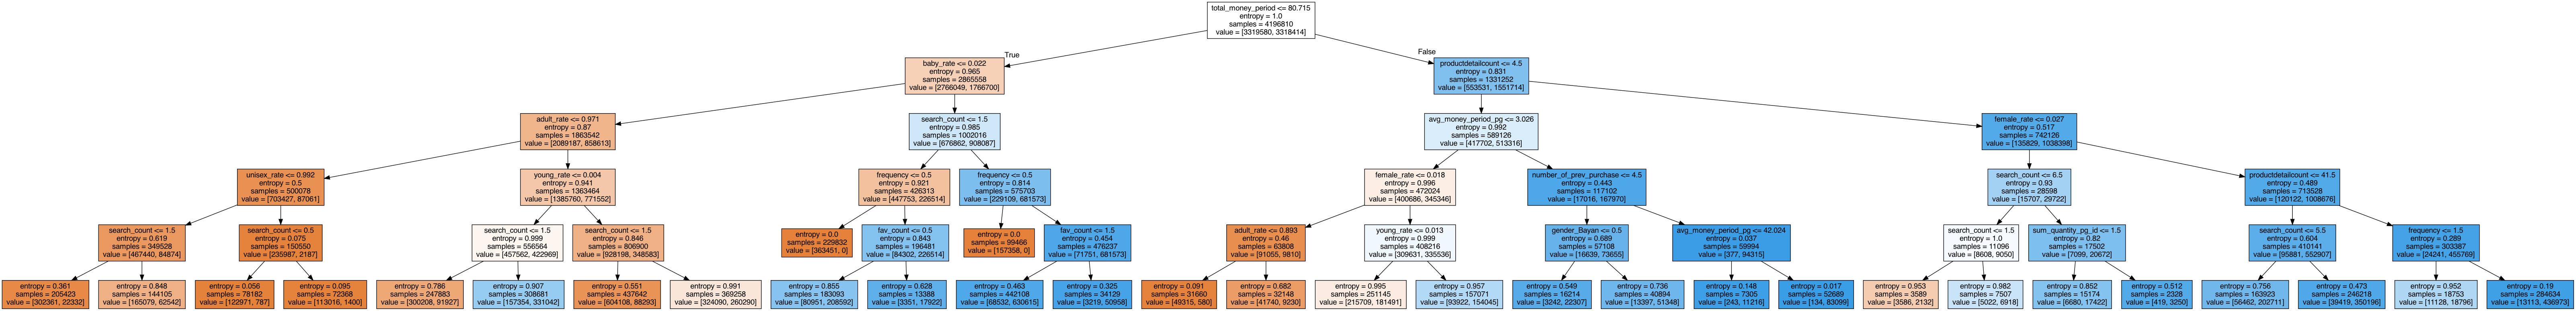

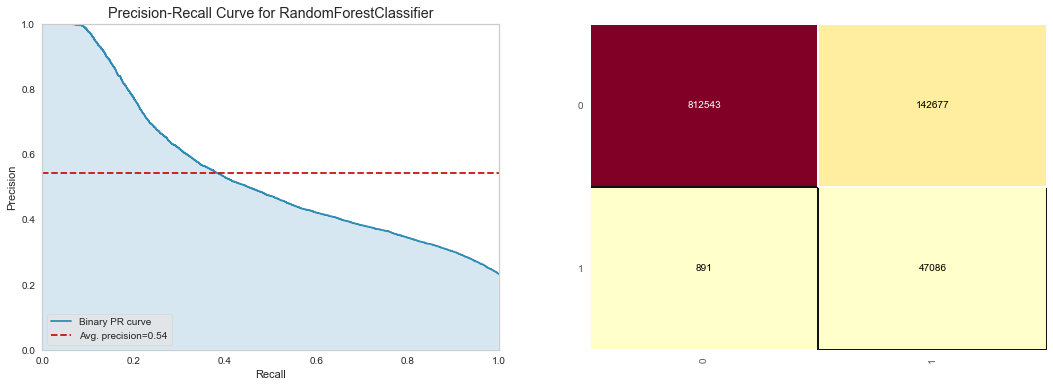

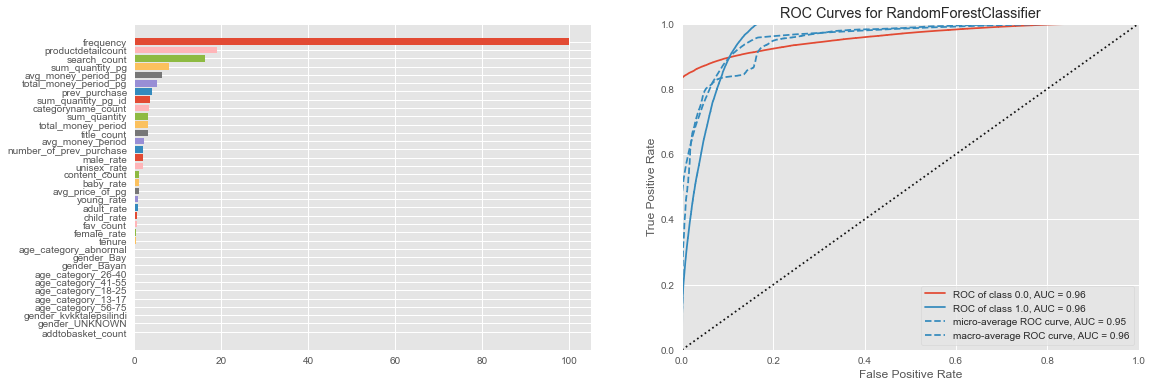

<Figure size 432x288 with 0 Axes>

In [84]:
print('Random Forest Training Accuracy: {:.3f}'.format(accuracy_score(y_train, estimator.predict(X_train))))
print('Random Forest Training Recall: {:.3f}'.format(precision_score(y_train, estimator.predict(X_train))))
print('Random Forest Training Precision: {:.3f}'.format(recall_score(y_train, estimator.predict(X_train))),"\n")

print('Random Forest Test Accuracy: {:.3f}'.format(accuracy_score(y_test, estimator.predict(X_test))))
print('Random Forest Test Recall: {:.3f}'.format(precision_score(y_test, estimator.predict(X_test))))
print('Random Forest Test Precision: {:.3f}'.format(recall_score(y_test, estimator.predict(X_test))),"\n")

print('Random Forest Train f1 - score: {:.3f}'.format(f1_score(y_train, estimator.predict(X_train))))
print('Random Forest Test f1 - score: {:.3f}'.format(f1_score(y_test, estimator.predict(X_test))),"\n")
#print(classification_report(y_test, estimator.predict(X_test)),"\n")

num_tree = estimator.estimators_[0]
print('\nVisualizing Tree', 0)

graph = Source(tree.export_graphviz(num_tree,
                                    out_file=None,
                                    feature_names=X_train.columns,
                                    filled = True))

display(Image(data=graph.pipe(format='png')))

plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)

plt.style.use("ggplot")

print('\n\n')

prc = PrecisionRecallCurve(model)
prc.fit(X_train, y_train)
prc.score(X_test, y_test)
################################################################################################    
plt.subplot(1, 2, 2)
cm = ConfusionMatrix(model, classes=[0,1])
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

prc.show()
################################################################################################
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
viz = FeatureImportances(model)
viz.fit(X_train, y_train)
################################################################################################
plt.subplot(1, 2, 2)
rocauc = ROCAUC(model)
rocauc.fit(X_train, y_train)
rocauc.score(X_test, y_test)  
r = rocauc.poof()

viz.show();

In [85]:
print(set(df_target_train[['userid']]) - set(df_test[['userid']]))
print(set(df_target_train[['currentbugroupname']]) - set(df_test[['currentbugroupname']]))
print(set(df_target_train[['userid',"currentbugroupname"]]) - set(df_test[['userid',"currentbugroupname"]]))

print(set(df_test[['userid']]) - set(df_target_train[['userid']]))
print(set(df_test[['currentbugroupname']]) - set(df_target_train[['currentbugroupname']]))
print(set(df_test[['userid',"currentbugroupname"]]) - set(df_target_train[['userid',"currentbugroupname"]]))

set()
set()
set()
set()
set()
set()


In [86]:
print(set(df_target_train[['userid']]) - set(df_final_first_last_dropped[['userid']]))
print(set(df_target_train[['userid',"currentbugroupname"]]) - set(df_final_first_last_dropped[['userid',"currentbugroupname"]]))

set()
set()


In [87]:
# define target
df_target_train['target']=1

user_list = set(df_target_train.userid)
group_list = set(df_test.currentbugroupname)

index = pd.MultiIndex.from_product([user_list, group_list], names = ["userid", "currentbugroupname"])

df_trainuserids = pd.DataFrame(index = index).reset_index()

df_trainuserids_target = df_trainuserids.merge(df_target_train,how='left',on=['userid','currentbugroupname'])
print("Shape:",df_trainuserids_target.shape)
df_trainuserids_target.fillna(0,inplace=True)
df_trainuserids_target.head()

Shape: (244824, 3)


userid        currentbugroupname  target
0  4587520                      FMCG     0.0
1  4587520                   Mobilya     0.0
2  4587520  Aksesuar & Saat & Gözlük     0.0
3  4587520                       GAS     1.0
4  4587520          Ayakkabı & Çanta     0.0

In [88]:
df_target_train.duplicated().sum()

0

In [89]:
df_final_first_last_dropped.duplicated().sum()

127685

In [90]:
# better than all data
df_trainuserids_target['target'].mean()

0.10102767702512826

In [91]:
df_final_train = df_trainuserids_target.merge(df_final_first_last_dropped.drop_duplicates(),
                                              how='left',on=['userid', 'currentbugroupname'])
df_final_train

userid currentbugroupname  target_x  period_trx  content_count  \
0         4587520               FMCG       0.0           1         104966   
1         4587520               FMCG       0.0           2         104966   
2         4587520               FMCG       0.0           3         104966   
3         4587520               FMCG       0.0           4         104966   
4         4587520               FMCG       0.0           5         104966   
...           ...                ...       ...         ...            ...   
2203411  18087930      Private Label       0.0           5          16635   
2203412  18087930      Private Label       0.0           6          16635   
2203413  18087930      Private Label       0.0           7          16635   
2203414  18087930      Private Label       0.0           8          16635   
2203415  18087930      Private Label       0.0           9          16635   

         title_count  categoryname_count  male_rate  female_rate  unisex_rate  \
0              99780                 705   0.021472     0.067842     0.910685   
1              99780                 705   0.021472     0.067842     0.910685   
2              99780                 705   0.021472     0.067842     0.910685   
3              99780                 705   0.021472     0.067842     0.910685   
4              99780                 705   0.021472     0.067842     0.910685   
...              ...                 ...        ...          ...          ...   
2203411        12801                  63   0.133273     0.866546     0.000180   
2203412        12801                  63   0.133273     0.866546     0.000180   
2203413        12801                  63   0.133273     0.866546     0.000180   
2203414        12801                  63   0.133273     0.866546     0.000180   
2203415        12801                  63   0.133273     0.866546     0.000180   

         baby_rate  young_rate  adult_rate  child_rate gender  tenure  \
0         0.063025    0.017700    0.886721    0.032554  Bayan     112   
1         0.063025    0.017700    0.886721    0.032554  Bayan     112   
2         0.063025    0.017700    0.886721    0.032554  Bayan     112   
3         0.063025    0.017700    0.886721    0.032554  Bayan     112   
4         0.063025    0.017700    0.886721    0.032554  Bayan     112   
...            ...         ...         ...         ...    ...     ...   
2203411   0.000000    0.000181    0.999819    0.000000  Bayan      23   
2203412   0.000000    0.000181    0.999819    0.000000  Bayan      23   
2203413   0.000000    0.000181    0.999819    0.000000  Bayan      23   
2203414   0.000000    0.000181    0.999819    0.000000  Bayan      23   
2203415   0.000000    0.000181    0.999819    0.000000  Bayan      23   

        age_category  search_count  avg_money_period  total_money_period  \
0           abnormal           0.0               0.0                 0.0   
1           abnormal           2.0               0.0                 0.0   
2           abnormal           4.0               0.0                 0.0   
3           abnormal           0.0             189.9               189.9   
4           abnormal           0.0               0.0                 0.0   
...              ...           ...               ...                 ...   
2203411     abnormal           0.0               0.0                 0.0   
2203412     abnormal           0.0               0.0                 0.0   
2203413     abnormal           0.0               0.0                 0.0   
2203414     abnormal           1.0               0.0                 0.0   
2203415     abnormal           0.0               0.0                 0.0   

         avg_money_period_pg  total_money_period_pg  avg_price_of_pg  \
0                        0.0                    0.0        45.033911   
1                        0.0                    0.0        50.666104   
2                        0.0                    0.0        49.082526   
3                        0.0       

In [92]:
temp = df_final_train[['userid', 'currentbugroupname','target_x',
                'target_y']].groupby(['userid', 'currentbugroupname']).sum()
temp[temp['target_x'] != temp['target_y']]

target_x  target_y
userid   currentbugroupname                          
2086     Ayakkabı & Çanta               9.0       0.0
         Ev                             0.0       1.0
         FMCG                           0.0       1.0
         Mobilya                        0.0       1.0
         Private Label                  9.0       0.0
...                                     ...       ...
44409176 GM                             0.0       1.0
44419648 Aksesuar & Saat & Gözlük       0.0       1.0
         Ayakkabı & Çanta               9.0       0.0
44425523 Ayakkabı & Çanta               0.0       1.0
44429700 Elektronik                     9.0       1.0

[57683 rows x 2 columns]

In [93]:
df_final_first_last_dropped_9 = df_final_first_last_dropped[df_final_first_last_dropped.period_trx==9]
df_final_train = df_trainuserids_target.merge(df_final_first_last_dropped_9.drop_duplicates().drop(
                                              columns=['target']),
                                              how='left',on=['userid', 'currentbugroupname'])
df_final_train.info()
df_final_train

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244824 entries, 0 to 244823
Data columns (total 32 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   userid                   244824 non-null  int64  
 1   currentbugroupname       244824 non-null  object 
 2   target                   244824 non-null  float64
 3   period_trx               244824 non-null  int64  
 4   content_count            244824 non-null  int64  
 5   title_count              244824 non-null  int64  
 6   categoryname_count       244824 non-null  int64  
 7   male_rate                244824 non-null  float64
 8   female_rate              244824 non-null  float64
 9   unisex_rate              244824 non-null  float64
 10  baby_rate                244824 non-null  float64
 11  young_rate               244824 non-null  float64
 12  adult_rate               244824 non-null  float64
 13  child_rate               244824 non-null  float64
 14  gend

userid        currentbugroupname  target  period_trx  content_count  \
0        4587520                      FMCG     0.0           9         104966   
1        4587520                   Mobilya     0.0           9          39611   
2        4587520  Aksesuar & Saat & Gözlük     0.0           9         113688   
3        4587520                       GAS     1.0           9          60113   
4        4587520          Ayakkabı & Çanta     0.0           9         120934   
...          ...                       ...     ...         ...            ...   
244819  18087930           Branded Tekstil     0.0           9         420275   
244820  18087930                Elektronik     0.0           9          68341   
244821  18087930                  Kozmetik     0.0           9          52424   
244822  18087930                        Ev     0.0           9         242807   
244823  18087930             Private Label     0.0           9          16635   

        title_count  categoryname_count  male_rate  female_rate  unisex_rate  \
0             99780                 705   0.021472     0.067842     0.910685   
1             35827                 189   0.004043     0.012645     0.983312   
2             88827                 349   0.115857     0.628459     0.255684   
3             44177                 281   0.473989     0.355342     0.170669   
4             82879                 178   0.166309     0.712309     0.121383   
...             ...                 ...        ...          ...          ...   
244819       331895                 603   0.204535     0.712622     0.082843   
244820        59755                 380   0.016637     0.023151     0.960212   
244821        50704                 221   0.046158     0.565753     0.388089   
244822       213562                 788   0.007735     0.030434     0.961831   
244823        12801                  63   0.133273     0.866546     0.000180   

        baby_rate  young_rate  adult_rate  child_rate gender  tenure  \
0        0.063025    0.017700    0.886721    0.032554  Bayan     112   
1        0.008761    0.007136    0.967957    0.016145  Bayan     112   
2        0.002668    0.009594    0.977301    0.010437  Bayan     112   
3        0.001742    0.004120    0.970374    0.023764  Bayan     112   
4        0.001599    0.004944    0.975094    0.018363  Bayan     112   
...           ...         ...         ...         ...    ...     ...   
244819   0.059099    0.005175    0.811704    0.124022  Bayan      23   
244820   0.000175    0.006023    0.990981    0.002822  Bayan      23   
244821   0.001640    0.023807    0.972395    0.002159  Bayan      23   
244822   0.006553    0.003021    0.979204    0.011222  Bayan      23   
244823   0.000000    0.000181    0.999819    0.000000  Bayan      23   

       age_category  search_count  avg_money_period  total_money_period  \
0          abnormal           1.0               0.0                 0.0   
1          abnormal           1.0               0.0                 0.0   
2          abnormal           1.0               0.0                 0.0   
3          abnormal           1.0               0.0                 0.0   
4          abnormal           1.0               0.0                 0.0   
...             ...           ...               ...                 ...   
244819     abnormal           0.0               0.0                 0.0   
244820     abnormal           0.0               0.0                 0.0   
244821     abnormal           0.0               0.0                 0.0   
244822     abnormal           0.0               0.0                 0.0   
244823     abnormal           0.0               0.0                 0.0   

        avg_money_period_pg  total_money_period_pg  avg_price_of_pg  \
0                       0.0                    0.0        45.689137   
1                       0.0                    0.0       210.642434   
2                       0.0                    0.0        66.151602   
3                       0.

In [94]:
df_final_train_dum = pd.get_dummies(df_final_train, columns=['gender', 'age_category'])

In [95]:
# define train and test
X_all = df_final_train_dum.drop(columns=['userid','currentbugroupname','period_trx','target'])
y_all = df_final_train_dum['target']
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.2, stratify = y_all)
X_train.shape

(195859, 36)

In [96]:
ros = RandomOverSampler(random_state=23)
X_train, y_train = ros.fit_resample(X_train, y_train)

In [97]:
model = RandomForestClassifier(random_state=1,
                                   criterion="entropy",
                                   bootstrap="True",
                                   n_estimators=100,
                                   max_depth=8,
                                   min_samples_split=5,
                                   min_samples_leaf=5,
                                   verbose=False)

estimator = model.fit(X_train, y_train)

Random Forest Training Accuracy: 0.700
Random Forest Training Recall: 0.692
Random Forest Training Precision: 0.722 

Random Forest Test Accuracy: 0.681
Random Forest Test Recall: 0.200
Random Forest Test Precision: 0.721 

Random Forest Train f1 - score: 0.707
Random Forest Test f1 - score: 0.313 


Visualizing Tree 0


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.984822 to fit


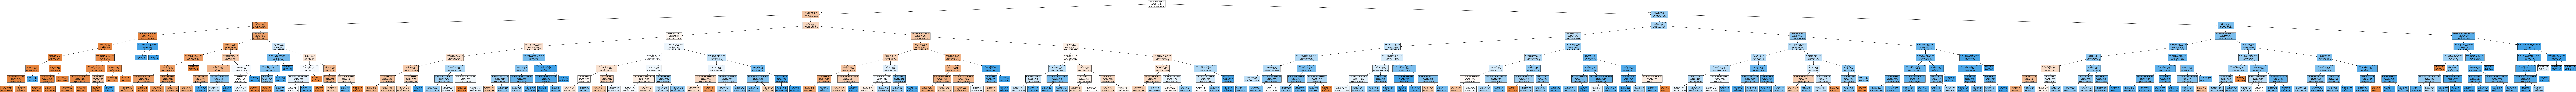

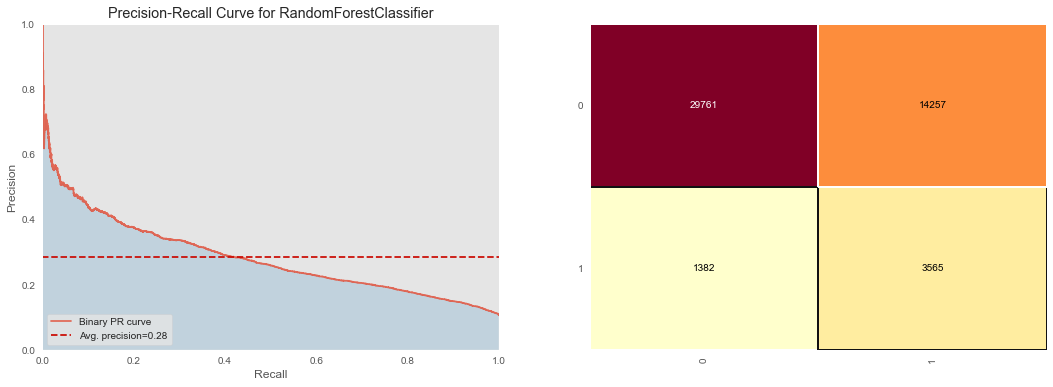

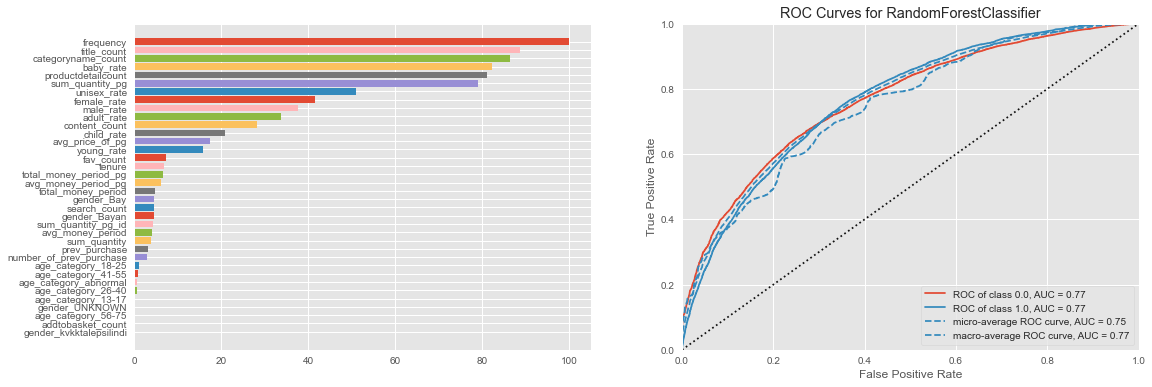

<Figure size 432x288 with 0 Axes>

In [98]:
print('Random Forest Training Accuracy: {:.3f}'.format(accuracy_score(y_train, estimator.predict(X_train))))
print('Random Forest Training Recall: {:.3f}'.format(precision_score(y_train, estimator.predict(X_train))))
print('Random Forest Training Precision: {:.3f}'.format(recall_score(y_train, estimator.predict(X_train))),"\n")

print('Random Forest Test Accuracy: {:.3f}'.format(accuracy_score(y_test, estimator.predict(X_test))))
print('Random Forest Test Recall: {:.3f}'.format(precision_score(y_test, estimator.predict(X_test))))
print('Random Forest Test Precision: {:.3f}'.format(recall_score(y_test, estimator.predict(X_test))),"\n")

print('Random Forest Train f1 - score: {:.3f}'.format(f1_score(y_train, estimator.predict(X_train))))
print('Random Forest Test f1 - score: {:.3f}'.format(f1_score(y_test, estimator.predict(X_test))),"\n")
#print(classification_report(y_test, estimator.predict(X_test)),"\n")

num_tree = estimator.estimators_[0]
print('\nVisualizing Tree', 0)

graph = Source(tree.export_graphviz(num_tree,
                                    out_file=None,
                                    feature_names=X_train.columns,
                                    filled = True))

display(Image(data=graph.pipe(format='png')))

plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)

plt.style.use("ggplot")

print('\n\n')

prc = PrecisionRecallCurve(model)
prc.fit(X_train, y_train)
prc.score(X_test, y_test)
################################################################################################    
plt.subplot(1, 2, 2)
cm = ConfusionMatrix(model, classes=[0,1])
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

prc.show()
################################################################################################
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
viz = FeatureImportances(model)
viz.fit(X_train, y_train)
################################################################################################
plt.subplot(1, 2, 2)
rocauc = ROCAUC(model)
rocauc.fit(X_train, y_train)
rocauc.score(X_test, y_test)  
r = rocauc.poof()

viz.show();

In [99]:
mythreshold = 0.65
print('Random Forest Training Accuracy: {:.3f}'.format(accuracy_score(y_train, (estimator.predict_proba(X_train)[:,1] >= mythreshold).astype(int))))
print('Random Forest Training Recall: {:.3f}'.format(precision_score(y_train, (estimator.predict_proba(X_train)[:,1] >= mythreshold).astype(int))))
print('Random Forest Training Precision: {:.3f}'.format(recall_score(y_train, (estimator.predict_proba(X_train)[:,1] >= mythreshold).astype(int))),"\n")

print('Random Forest Test Accuracy: {:.3f}'.format(accuracy_score(y_test, (estimator.predict_proba(X_test)[:,1] >= mythreshold).astype(int))))
print('Random Forest Test Recall: {:.3f}'.format(precision_score(y_test, (estimator.predict_proba(X_test)[:,1] >= mythreshold).astype(int))))
print('Random Forest Test Precision: {:.3f}'.format(recall_score(y_test, (estimator.predict_proba(X_test)[:,1] >= mythreshold).astype(int))),"\n")

print('Random Forest Train f1 - score: {:.3f}'.format(f1_score(y_train, (estimator.predict_proba(X_train)[:,1] >= mythreshold).astype(int))))
print('Random Forest Test f1 - score: {:.3f}'.format(f1_score(y_test, (estimator.predict_proba(X_test)[:,1] >= mythreshold).astype(int))),"\n")

Random Forest Training Accuracy: 0.659
Random Forest Training Recall: 0.781
Random Forest Training Precision: 0.441 

Random Forest Test Accuracy: 0.830
Random Forest Test Recall: 0.281
Random Forest Test Precision: 0.438 

Random Forest Train f1 - score: 0.564
Random Forest Test f1 - score: 0.343 



In [100]:
df_test.head()

userid currentbugroupname  probability  target
0  20152944      Private Label          NaN     NaN
1   6662068      Private Label          NaN     NaN
2  11941706      Private Label          NaN     NaN
3  12406170      Private Label          NaN     NaN
4  20939786      Private Label          NaN     NaN

In [101]:
df_final_test = df_test.merge(df_final_first_last_dropped_9.drop_duplicates().drop(
                                              columns=['target']),
                                              how='left',on=['userid', 'currentbugroupname'])
#df_final_test.info()
#df_final_test

In [102]:
df_final_test.duplicated().sum()

0

In [103]:
df_final_test_dum = pd.get_dummies(df_final_test, columns=['gender', 'age_category'])

In [104]:
df_test.columns

Index(['userid', 'currentbugroupname', 'probability', 'target'], dtype='object')

In [105]:
results_rf = df_final_test_dum[['userid', 'currentbugroupname', 'probability', 'target']]
X_test_df = df_final_test_dum.drop(columns=['userid','currentbugroupname','period_trx','target','probability'])
y_test_df = df_final_test_dum['target']
X_test_df

content_count  title_count  categoryname_count  male_rate  \
0               16635        12801                  63   0.133273   
1               16635        12801                  63   0.133273   
2               16635        12801                  63   0.133273   
3               16635        12801                  63   0.133273   
4               16635        12801                  63   0.133273   
...               ...          ...                 ...        ...   
244831            173          173                   8   0.000000   
244832            173          173                   8   0.000000   
244833            173          173                   8   0.000000   
244834            173          173                   8   0.000000   
244835            173          173                   8   0.000000   

        female_rate  unisex_rate  baby_rate  young_rate  adult_rate  \
0          0.866546      0.00018        0.0    0.000181    0.999819   
1          0.866546      0.00018        0.0    0.000181    0.999819   
2          0.866546      0.00018        0.0    0.000181    0.999819   
3          0.866546      0.00018        0.0    0.000181    0.999819   
4          0.866546      0.00018        0.0    0.000181    0.999819   
...             ...          ...        ...         ...         ...   
244831     0.000000      1.00000        0.0    0.000000    0.818182   
244832     0.000000      1.00000        0.0    0.000000    0.818182   
244833     0.000000      1.00000        0.0    0.000000    0.818182   
244834     0.000000      1.00000        0.0    0.000000    0.818182   
244835     0.000000      1.00000        0.0    0.000000    0.818182   

        child_rate  tenure  search_count  avg_money_period  \
0         0.000000      21           0.0             0.000   
1         0.000000     104           9.0             0.000   
2         0.000000      55          50.0             0.000   
3         0.000000      50           3.0            43.518   
4         0.000000      19           0.0             0.000   
...            ...     ...           ...               ...   
244831    0.181818      13           0.0            89.990   
244832    0.181818     115           2.0             0.000   
244833    0.181818      25           0.0             0.000   
244834    0.181818      11          36.0            92.370   
244835    0.181818      10           0.0             0.000   

        total_money_period  avg_money_period_pg  total_money_period_pg  \
0                     0.00                  0.0                    0.0   
1                     0.00                  0.0                    0.0   
2                     0.00                  0.0                    0.0   
3                   217.59                  0.0                    0.0   
4                     0.00                  0.0                    0.0   
...                    ...                  ...                    ...   
244831               89.99                  0.0                    0.0   
244832                0.00                  0.0                    0.0   
244833                0.00                  0.0                    0.0   
244834               92.37                  0.0                    0.0   
244835                0.00                  0.0                    0.0   

        avg_price_of_pg  sum_quantity  sum_quantity_pg  sum_quantity_pg_id  \
0             64.857591           0.0           2963.0                 0.0   
1             64.857591           0.0           2963.0                 0.0   
2             64.857591           0.0           2963.0                 0.0   
3             64.857591           5.0           2963.0                 0.0   
4             64.857591           0.0           2963.0                 0.0   
...                 ...           ...              ...                 ...   
244831        89.890526           1.0             24.0                 0.0   
244832        89.890526           0.0             24.0              

In [106]:
results_rf

userid currentbugroupname  probability  target
0       20152944      Private Label          NaN     NaN
1        6662068      Private Label          NaN     NaN
2       11941706      Private Label          NaN     NaN
3       12406170      Private Label          NaN     NaN
4       20939786      Private Label          NaN     NaN
...          ...                ...          ...     ...
244831  24094896      Digital Goods          NaN     NaN
244832   3625552      Digital Goods          NaN     NaN
244833  17383254      Digital Goods          NaN     NaN
244834  26909708      Digital Goods          NaN     NaN
244835  28564690      Digital Goods          NaN     NaN

[244836 rows x 4 columns]

In [107]:
results_rf['probability'] = estimator.predict_proba(X_test_df)[:,1]
results_rf['target'] = 0
results_rf.loc[results_rf['probability'] >= 0.65, 'target'] = 1

In [108]:
results_rf.head()

userid currentbugroupname  probability  target
0  20152944      Private Label     0.621383       0
1   6662068      Private Label     0.686453       1
2  11941706      Private Label     0.674191       1
3  12406170      Private Label     0.366074       0
4  20939786      Private Label     0.313363       0

In [109]:
results_rf['target'].sum()

38080

In [110]:
results_rf.to_csv('df_test_Purchase_Prediction_randomforest.csv')

### <span id="18"></span> lightgbm
<hr/>

In [111]:
# define train and test
X_all = df_final_train.drop(columns=['userid','currentbugroupname','period_trx','target'])
y_all = df_final_train['target']
#determine categorical columns
cat_cols = X_all.columns[X_all.dtypes == 'object'].values
print("Categorical Columns:",cat_cols)
X_all[cat_cols] = X_all[cat_cols].astype('category')

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.2, stratify = y_all)
X_train.shape

Categorical Columns: ['gender' 'age_category']


(195859, 28)

In [112]:
ros = RandomOverSampler(random_state=23)
X_train, y_train = ros.fit_resample(X_train, y_train)

In [113]:
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

In [114]:
params = {'metric':'binary_logloss',
          'objective':'binary',
          'is_unbalance':True,
          'bagging_fraction':0.6,
          'boosting':'gbdt',
          'learning_rate': 0.2,
          'max_depth': 20,
          'num_leaves': 32,
          'feature_fraction': 0.8,
          'early_stopping' : 15
             }

[LightGBM] [Info] Number of positive: 176072, number of negative: 176072
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015744 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1818
[LightGBM] [Info] Number of data points in the train set: 352144, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[1]	train's binary_logloss: 0.654489	test's binary_logloss: 0.654714
Training until validation scores don't improve for 15 rounds
[2]	train's binary_logloss: 0.628832	test's binary_logloss: 0.629591
[3]	train's binary_logloss: 0.61129	test's binary_logloss: 0.612763
[4]	train's binary_logloss: 0.598971	test's binary_logloss: 0.60119
[5]	train's binary_logloss: 0.590519	test's binary_logloss: 0.593583
[6]	train's binary_logloss: 0.583973	test's binary_logloss: 0.587539
[7]	train's binary

<AxesSubplot:title={'center':'Metric during training'}, xlabel='Iterations', ylabel='binary_logloss'>

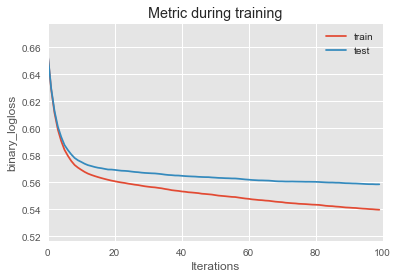

In [115]:
evals_result = {}

clf = lgb.train(params, 
                train_data, 
                valid_sets=[test_data, train_data], 
                valid_names=['test', 'train'], 
                evals_result=evals_result)

lgb.plot_metric(evals_result, metric='binary_logloss')

In [116]:
y_predicted_train=clf.predict(X_train)
y_predicted_train = np.where(y_predicted_train<0.65,0,1)
y_predicted_test=clf.predict(X_test)
y_predicted_test = np.where(y_predicted_test<0.65,0,1)
print('lgb Training Accuracy: {:.3f}'.format(accuracy_score(y_train, y_predicted_train)))
print('lgb Training Recall: {:.3f}'.format(precision_score(y_train, y_predicted_train)))
print('lgb Training Precision: {:.3f}'.format(recall_score(y_train, y_predicted_train)),"\n")

print('lgb Test Accuracy: {:.3f}'.format(accuracy_score(y_test, y_predicted_test)))
print('lgb Test Recall: {:.3f}'.format(precision_score(y_test, y_predicted_test)))
print('lgb Test Precision: {:.3f}'.format(recall_score(y_test, y_predicted_test)),"\n")

print('lgb Train f1 - score: {:.3f}'.format(f1_score(y_train, y_predicted_train)))
print('lgb Test f1 - score: {:.3f}'.format(f1_score(y_test, y_predicted_test)),"\n")
#print(classification_report(y_test, y_predicted_test),"\n")

lgb Training Accuracy: 0.678
lgb Training Recall: 0.809
lgb Training Precision: 0.466 

lgb Test Accuracy: 0.837
lgb Test Recall: 0.288
lgb Test Precision: 0.419 

lgb Train f1 - score: 0.591
lgb Test f1 - score: 0.342 



In [117]:
results_lgb = df_final_test[['userid', 'currentbugroupname', 'probability', 'target']]
X_test_df_1 = df_final_test.drop(columns=['userid','currentbugroupname','period_trx','target','probability'])
y_test_df_1 = df_final_test['target']
cat_cols = X_test_df_1.columns[X_test_df_1.dtypes == 'object'].values
print("Categorical Columns:",cat_cols)
X_test_df_1[cat_cols] = X_test_df_1[cat_cols].astype('category')
X_test_df_1

Categorical Columns: ['gender' 'age_category']


content_count  title_count  categoryname_count  male_rate  \
0               16635        12801                  63   0.133273   
1               16635        12801                  63   0.133273   
2               16635        12801                  63   0.133273   
3               16635        12801                  63   0.133273   
4               16635        12801                  63   0.133273   
...               ...          ...                 ...        ...   
244831            173          173                   8   0.000000   
244832            173          173                   8   0.000000   
244833            173          173                   8   0.000000   
244834            173          173                   8   0.000000   
244835            173          173                   8   0.000000   

        female_rate  unisex_rate  baby_rate  young_rate  adult_rate  \
0          0.866546      0.00018        0.0    0.000181    0.999819   
1          0.866546      0.00018        0.0    0.000181    0.999819   
2          0.866546      0.00018        0.0    0.000181    0.999819   
3          0.866546      0.00018        0.0    0.000181    0.999819   
4          0.866546      0.00018        0.0    0.000181    0.999819   
...             ...          ...        ...         ...         ...   
244831     0.000000      1.00000        0.0    0.000000    0.818182   
244832     0.000000      1.00000        0.0    0.000000    0.818182   
244833     0.000000      1.00000        0.0    0.000000    0.818182   
244834     0.000000      1.00000        0.0    0.000000    0.818182   
244835     0.000000      1.00000        0.0    0.000000    0.818182   

        child_rate gender  tenure age_category  search_count  \
0         0.000000  Bayan      21        18-25           0.0   
1         0.000000  Bayan     104     abnormal           9.0   
2         0.000000  Bayan      55     abnormal          50.0   
3         0.000000  Bayan      50     abnormal           3.0   
4         0.000000    Bay      19     abnormal           0.0   
...            ...    ...     ...          ...           ...   
244831    0.181818  Bayan      13     abnormal           0.0   
244832    0.181818  Bayan     115        26-40           2.0   
244833    0.181818  Bayan      25     abnormal           0.0   
244834    0.181818  Bayan      11     abnormal          36.0   
244835    0.181818    Bay      10     abnormal           0.0   

        avg_money_period  total_money_period  avg_money_period_pg  \
0                  0.000                0.00                  0.0   
1                  0.000                0.00                  0.0   
2                  0.000                0.00                  0.0   
3                 43.518              217.59                  0.0   
4                  0.000                0.00                  0.0   
...                  ...                 ...                  ...   
244831            89.990               89.99                  0.0   
244832             0.000                0.00                  0.0   
244833             0.000                0.00                  0.0   
244834            92.370               92.37                  0.0   
244835             0.000                0.00                  0.0   

        total_money_period_pg  avg_price_of_pg  sum_quantity  sum_quantity_pg  \
0                         0.0        64.857591           0.0           2963.0   
1                         0.0        64.857591           0.0           2963.0   
2                         0.0        64.857591           0.0           2963.0   
3                         0.0        64.857591           5.0           2963.0   
4                         0.0        64.857591           0.0           2963.0   
...                       ...              ...           ...              ...   
244831                    0.0        89.890526           1.0             24.0   
244832                    0.0        89.890526           0.0             24.0   

In [118]:
results_lgb['probability'] = clf.predict(X_test_df_1)
results_lgb['target'] = 0
results_lgb.loc[results_lgb['probability']>=0.65,'target'] = 1
results_lgb

userid currentbugroupname  probability  target
0       20152944      Private Label     0.657490       1
1        6662068      Private Label     0.707705       1
2       11941706      Private Label     0.509307       0
3       12406170      Private Label     0.377924       0
4       20939786      Private Label     0.259021       0
...          ...                ...          ...     ...
244831  24094896      Digital Goods     0.002232       0
244832   3625552      Digital Goods     0.002171       0
244833  17383254      Digital Goods     0.006212       0
244834  26909708      Digital Goods     0.000676       0
244835  28564690      Digital Goods     0.016870       0

[244836 rows x 4 columns]

In [119]:
results_lgb['target'].sum()

35642

In [120]:
results_lgb.to_csv('df_test_Purchase_Prediction_lgb.csv')